# PHASE 1 MILESTONE 2

# **I. INTRODUCTION**

Hello everybody! A warm welcome from me to you, welcome to my notebook. As the author of this notebook, here is my short profile:

* Name : Alexander Prasetyo Christianto
* Age : 23
* Last Education Background : Electrical Engineering
* Occupation : Full Time Data Science Student Batch-001

## 1.1 ABOUT THE DATA

The data set used in this project is available in the Kaggle (CC BY-NC-ND) and contains twenty columns (independent variables) that indicate the characteristics of the clients of a fictional telecommunications corporation. The Churn column (response variable) indicates whether the customer departed within the last month or not. The class No includes the clients that did not leave the company last month, while the class Yes contains the clients that decided to terminate their relations with the company.

Here is the data dictionary for this project.

1. Demographic Information

| Column        | Description                                   | Value          |
|---------------|-----------------------------------------------|----------------|
| gender        | Whether the client is a female or a male      | (Female, Male) |
| SeniorCitizen | Whether the client is a senior citizen or not | ( 0, 1)        |
| Partner       | Whether the client has a partner or not       | (Yes, No)      |
| Dependents    | Whether the client has dependents or not      | (Yes, No)      |

2. Customer Account Information

| Column           | Description                                               | Value                                                                                |
|------------------|-----------------------------------------------------------|--------------------------------------------------------------------------------------|
| tenure           | Number of months the customer has stayed with the company | (Multiple different numeric values)                                                  |
| Contract         | Indicates the customer’s current contract type            | (Month-to-Month, One year, Two year)                                                 |
| PaperlessBilling | Whether the client has paperless billing or not           | (Yes, No)                                                                            |
| PaymentMethod    | The customer’s payment method                             | (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)) |
| MontlyCharges    | The amount charged to the customer monthly                | (Multiple different numeric values)                                                  |
| TotalCharges     | The total amount charged to the customer                  | (Multiple different numeric values)                                                  |

3. Services Information

| Column           | Description                                                           | Value                          |
|------------------|-----------------------------------------------------------------------|--------------------------------|
| PhoneService     | Whether the client has a phone service or not                         | (Yes, No)                      |
| MultipleLines    | Whether the client has multiple lines or not                          | (No phone service, No, Yes)    |
| InternetServices | Whether the client is subscribed to Internet service with the company | (DSL, Fiber optic, No)         |
| OnlineSecurity   | Whether the client has online security or not                         | (No internet service, No, Yes) |
| OnlineBackup     | Whether the client has online backup or not                           | (No internet service, No, Yes) |
| DeviceProtection | Whether the client has device protection or not                       | (No internet service, No, Yes) |
| TechSupport      | Whether the client has tech support or not                            | (No internet service, No, Yes) |
| StreamingTV      | Whether the client has streaming TV or not                            | (No internet service, No, Yes) |
| StreamingMovies  | Whether the client has streaming movies or not                        | (No internet service, No, Yes) |

## 1.2 BUSINESS PROBLEM UNDERSTANDING

### 1.2.1 CONTEXT

**TELCO AND CHURN**

TELCO is a company that is engaged in providing internet services and other services (assumed to be streaming services and the like).CHURN here is defined as a customer who stops subscribing to services provided by TELCO.

Churn in internet service providers can be caused by several things as follows:

- Customers get better offers from competitors.
- The quality of services provided over time is getting worse.
- customer changes domicile that is not reached by the provider.

**IMPACT OF CHURN**

- We assume the contract for an annual internet subscription is $1000 dollars, if you lose 100 subscribers within 1 year, then the value of lost revenue is $100000
- To find a new customer (as a substitute for a churn customer), the cost required is 6-7 times greater than the cost to retain an old customer.

### 1.2.2 PROBLEM STATEMENT

Customer churn is expensive. By knowing which customers will churn, the company can take action to return these customers such as giving promos and so on. But the company must also be sure that it is the customer who will really churn, if given to a loyal customer or customer who will not churn, it will actually harm the company.

In addition, by knowing the number of customers who churn, the company can target the number of new customer searches to cover the losses that occur due to the customer churn.

### 1.2.3 OBJECTIVES

Based on these problems, TELCO wants to have a Machine Learning model that has the ability to predict the possibility of customers who will churn or who will not, so that preventive actions can be taken such as providing incentives / promos. But the model must also be able to ensure that it is the customer who will really churn, if it is given to a loyal customer or customer who will not churn, it will actually harm the company.

The company also wants to know the factors / variables that influence the customer to churn, so that TELCO can prepare an improvement strategy for their business.

### 1.2.4 ACTION AND VALUE

Knowing the customer who will churn and their characteristics to be given a solution so that the customer does not churn.

The value are:

- Prevent massive losses due to customer churn
- Can determine for the right customer (customer who will churn) to be given a solution so that the customer does not churn
- Knowing things that can be improved by TELCO so that customers can be more comfortable using TELCO services and reduce churn

# **II. IMPORT LIBRARIES**

I like my notebook to be neat and tidy, so this section is used for importing all the libraries that I am going to use throughout this project.

In [1]:
# common dataframe
import pandas as pd
import numpy as np
import pickle

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# math & statistic function
import scipy.stats as stats
import math

# remove all warnings, more robust
import warnings
warnings.filterwarnings("ignore")

# Machine Learning
# preprocessing
import phik
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# resampling method
from imblearn.over_sampling import SMOTENC
# from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# basic model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# ensemble model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# library for model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

# evaluation metrics
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# **III. DATA LOADING**

Chapter three is intended as a chapter for loading data into a notebook. The data entered into the notebook will be assigned to the `df` variable. Then, after the data is successfully loaded into the notebook I will show a preview of the first 5 rows and the last 5 rows in the dataset.

In [2]:
df = pd.read_csv('h8dsft_P1M2_Alexander_Prasetyo.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# check unique values of each column
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

As shown above, the data set contains 19 independent variables, which can be classified into 3 groups according to what I have written in sub chapter 1.1

In [6]:
# making a copy of the freshly loaded dataset

df_dirty = df.copy()

# **IV. DATA CLEANING**

Before the beginning of EDA, we want to know as much information as possible about the data, this is when the `pandas.DataFrame.info` method comes in handy. This method prints a concise summary of the data frame, including the column names and data types, the number of non-null values, and the data frame's memory usage.

## 4.1 HANDLING MISSING VALUES

In [7]:
# getting the dataframe general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As shown above, the data set contains 7043 observations and 21 columns. Apparently, there are no null values on the data set; however, I observe that the column `TotalCharges` was wrongly detected as an object. This column represents the total amount charged to the customer and it is, therefore, a numeric variable. For further analysis, I need to transform this column into a numeric data type.

In [8]:
# changing `TotalCharges` dtype from object to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

And then it is time to check the missing values in the dataset.

In [9]:
# checking null values on all columns
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As shown above, after I changed the `TotalCharges` column dtype from 'object' to numeric, apparently, there are missing values in that column. Before handling those missing values, I want to see those data entries that have missing values.

Below are data entries that have missing values.

In [10]:
# calling out all rows that contains missing values
df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


After upon taking a closer look, I found an interesting information from those data entries that have missing values. As you can see above, **in `tenure` column, the values are 0. This is contradictory to present values in `MonthlyCharges` columns.** `tenure` is the number of months the customer has stayed with the company, while `MonthlyCharges` is the amount charged to the customer monthly. **If the `tenure` is 0 then the `MonthlyCharges` supposed to be zero too.**

But I have decided to drop those rows from the dataset because there are no other columns, data, or information to do any imputation on the missing values and correct the data contained in the `tenure` and `MonthlyCharges` columns.

In [11]:
# dropping missing values from the dataset
df.dropna(inplace=True)

## 4.2 DUPLICATED DATA HANDLING

The next step is checking for duplicate data contained in the dataset. But, before that, I will drop `customerID` from the dataset because I won't be using that column for my analysis. The customerID column is useless to explain whether not the customer will churn.

In [12]:
# dropping `customerID` column from `df`
df.drop(columns='customerID', inplace=True)

And now it is time to check whether duplicated data entries are present or not in my dataset.

In [13]:
# works on the duplicate
dups = df.duplicated()

# How much duplicated data?
print("Currently, I have ", df[dups].shape[0], "rows of duplicate data")

# calling out the duplicated data
df[dups]

Currently, I have  22 rows of duplicate data


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


And based on the results of the examination, in the dataset that I will analyze there are 22 lines of data duplication. In handling this data duplication, I will keep duplicates except for the first occurrence.

In [14]:
# dropping the duplicated data and keeping first occurence

df.drop_duplicates(inplace = True)

In [15]:
# checking the number of values before and after removing duplicate data

print("Original data size, ", df_dirty.shape[0])
print("Data size after removing duplicate data, ", df.shape[0])

Original data size,  7043
Data size after removing duplicate data,  7010


## 4.3 COLUMNS MANIPULATION

In this sub-chapter, I will manipulate the data in certain column for better encoding puposes.

In [16]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [17]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes', 0:'No'})
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [18]:
df_clean_no_manip = df.copy()

All the cleaning and manipulation processes are done, and now I will make a copy of cleaned `df` for research purposes.

In [19]:
# duplicating the cleaned df

df_clean_copy = df.copy()

**Below is a recap of what was done in chapter IV:**

- change `tenure` dtype from object to numeric
- dropping all rows that have missing values because there is no additional information or supporting columns to fill those null values, moreover the rows that have missing values have an oddity in the `tenure` and `MonthlyCharges` columns. This will be explained below.
- drop duplicate data and keep the first row data occurrence.
- columns manipulation, changin 'Yes' to 1 and 'No' to 0.

**Interesting information found / discrepancies found:**

- In `tenure` column, there values of 0. This is contradictory to present values in `MonthlyCharges` columns which is not 0. This is not according to what I understand from the data dictionary.

All data cleaning processes have been carried out, therefore I can carry out the next step, namely exploratory data analysis (EDA) which will be carried out in chapter V.

# **V. EXPLORATORY DATA ANALYSIS**

Exploratory data analysis is the process of analyzing the main characteristics of a data set, typically using visualization techniques and summary statistics. The goal is to comprehend the data, identify patterns and anomalies, and validate assumptions before proceeding with further analysis.

The first thing I want to find out is the number of classes or labels contained in the column that I will make the target of the machine learning model that I will create. Therefore, I will visualize the target column, namely the `Churn` column.

## 5.1 TARGET VISUALIZATION

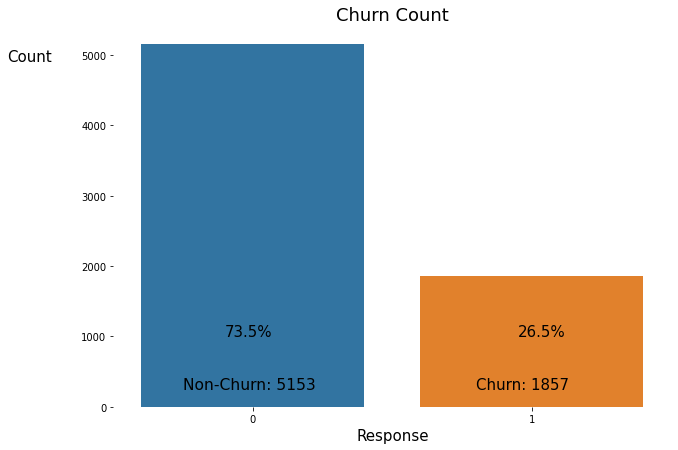

In [20]:
churning = df['Churn'].sum()
no_churning = len(df['Churn']) - churning

churning_perc = round(churning/len(df['Churn']) * 100, 1)
no_churning_perc = round(no_churning/len(df['Churn']) * 100, 1)

fig, ax = plt.subplots(figsize=(10,7))
sns.set_context('notebook', font_scale=1.2)

sns.countplot('Churn', data = df)
plt.annotate(f'Non-Churn: {no_churning}', 
             xy=(-0.25, 250),
            size=15.5)

plt.annotate('Churn: {}'.format(churning), 
             xy=(0.8, 250),
            size=15)

plt.annotate('{}%'.format(no_churning_perc), xy=(-0.1, 1000),size=15)
plt.annotate('{}%'.format(churning_perc), xy=(0.95, 1000),size=15)
plt.title('Churn Count', size=18)
plt.xlabel("Response",size=15)
plt.ylabel('Count', rotation=0, 
           labelpad=40,
           size=15)
ax.yaxis.set_label_coords(-0.15,.9)
plt.box(False)

Based on the graph that I have described above, it can be seen that the labels in the `Churn` column have very different proportions or can be called **imbalance data**. This is a warning to me because this unbalanced number of classes can give biased analysis and can also damage the performance of the model that will be created later. Therefore, at the data preprocessing stage, I will balance the labels in the `Churn` column.

## 5.2 CHURN PROPORTION IN DEMOGRAPHIC INFORMATION

In [21]:
def percentage_stacked_plot(columns_to_plot, super_title):
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(30, 10 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df_clean_copy[column], df_clean_copy['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['gold','aquamarine'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

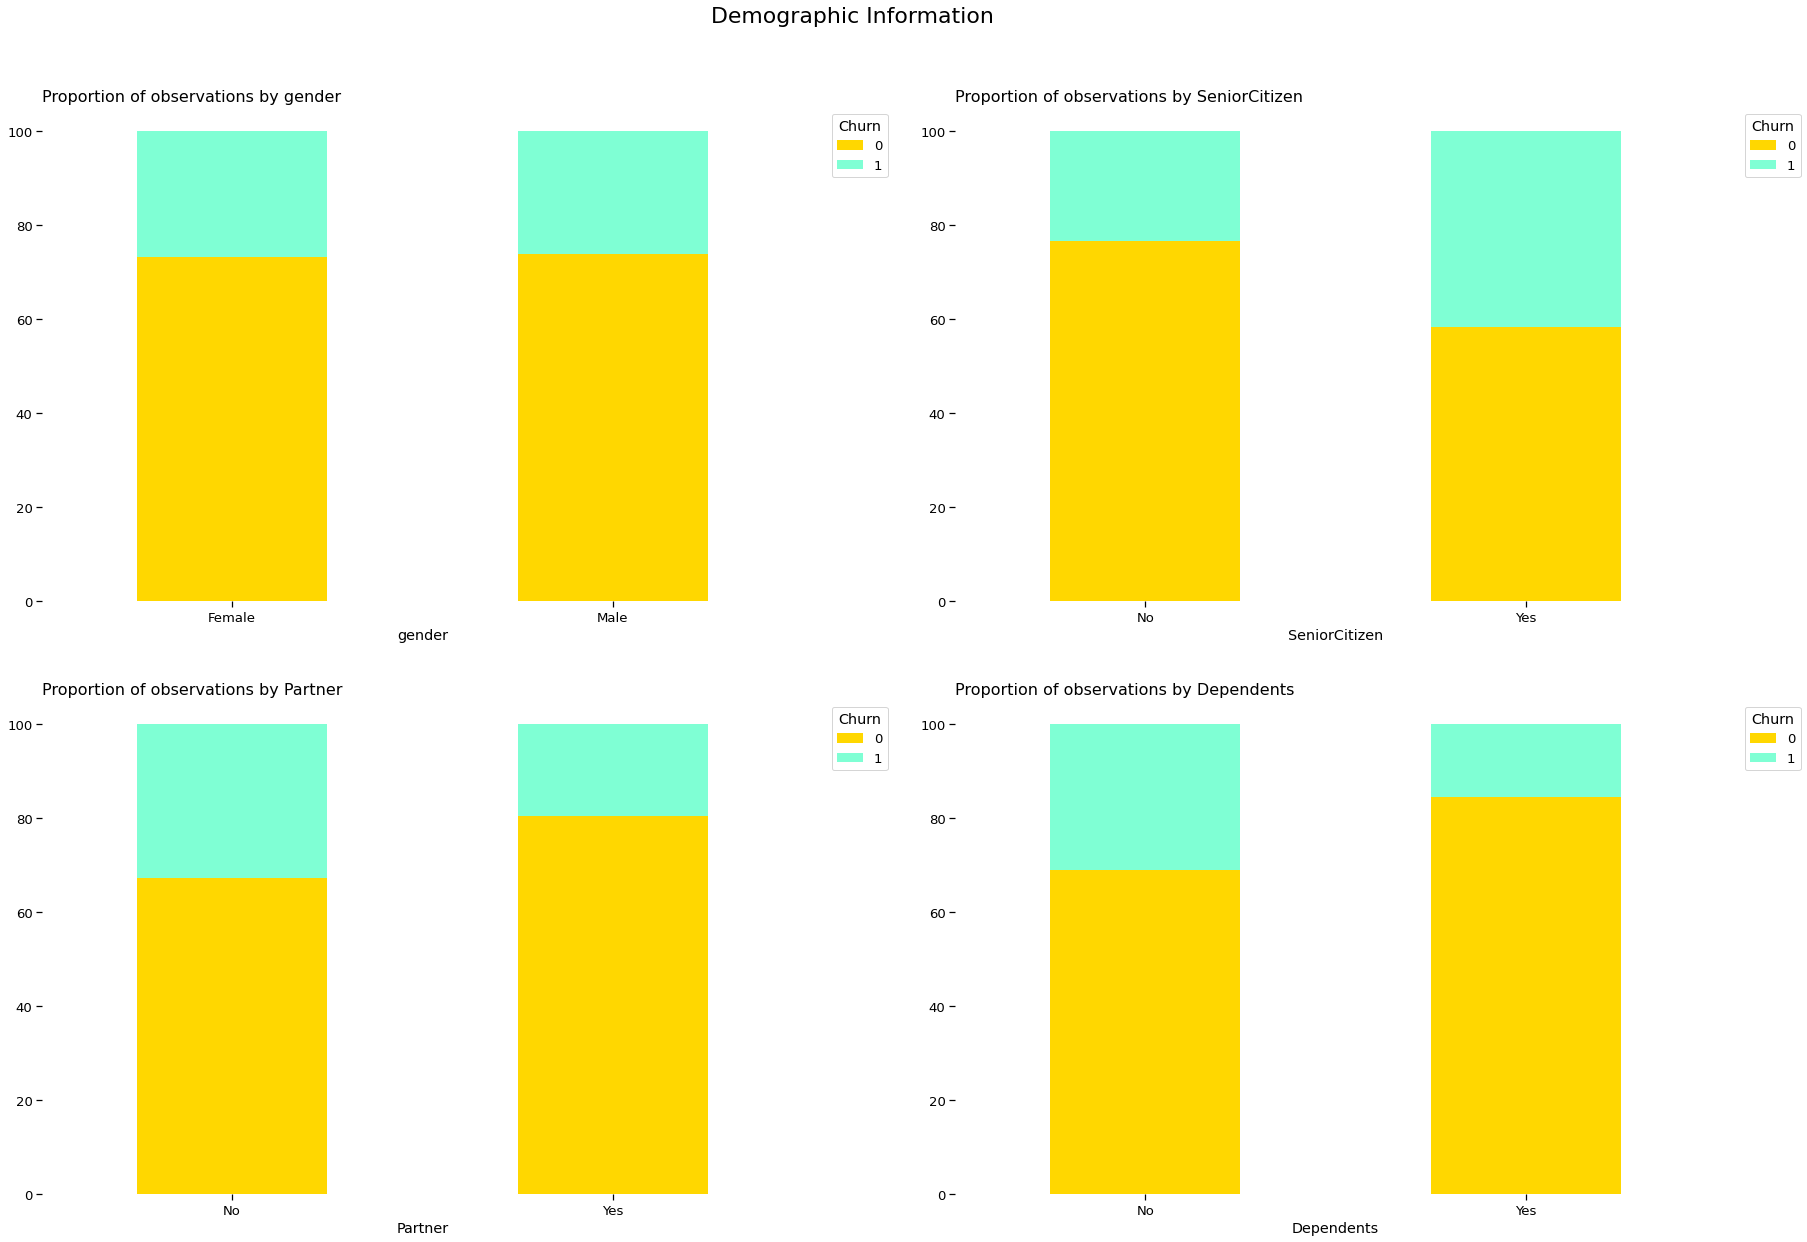

In [22]:

# demographic column names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

By analyzing demographic characteristics, we can draw these informations:

- Senior citizens have nearly twice the churn rate of young people.
- Gender has a strong predictive power. When a customer is male or female, the percentage of churn is the same.
- Customers with a partner churn at a lower rate than customers without a partner.
- We also may know that from this data it is known that the majority of TELCO customers (69.89%) live alone or without a companion (siblings, parents, friends and so on). Those who are not dependents has lower proportion of churning.

## 5.3. CHURN PROPORTION IN CUSTOMER ACCOUNT INFORMATION 

### 5.3.1 CUSTOMER ACCOUNT INFORMATION -> CATEGORICAL VARIABLES

As we did with demographic attributes, I am going to evaluate the percentage of Churn for each category of the customer account attributes (Contract, PaperlessBilling, PaymentMethod).

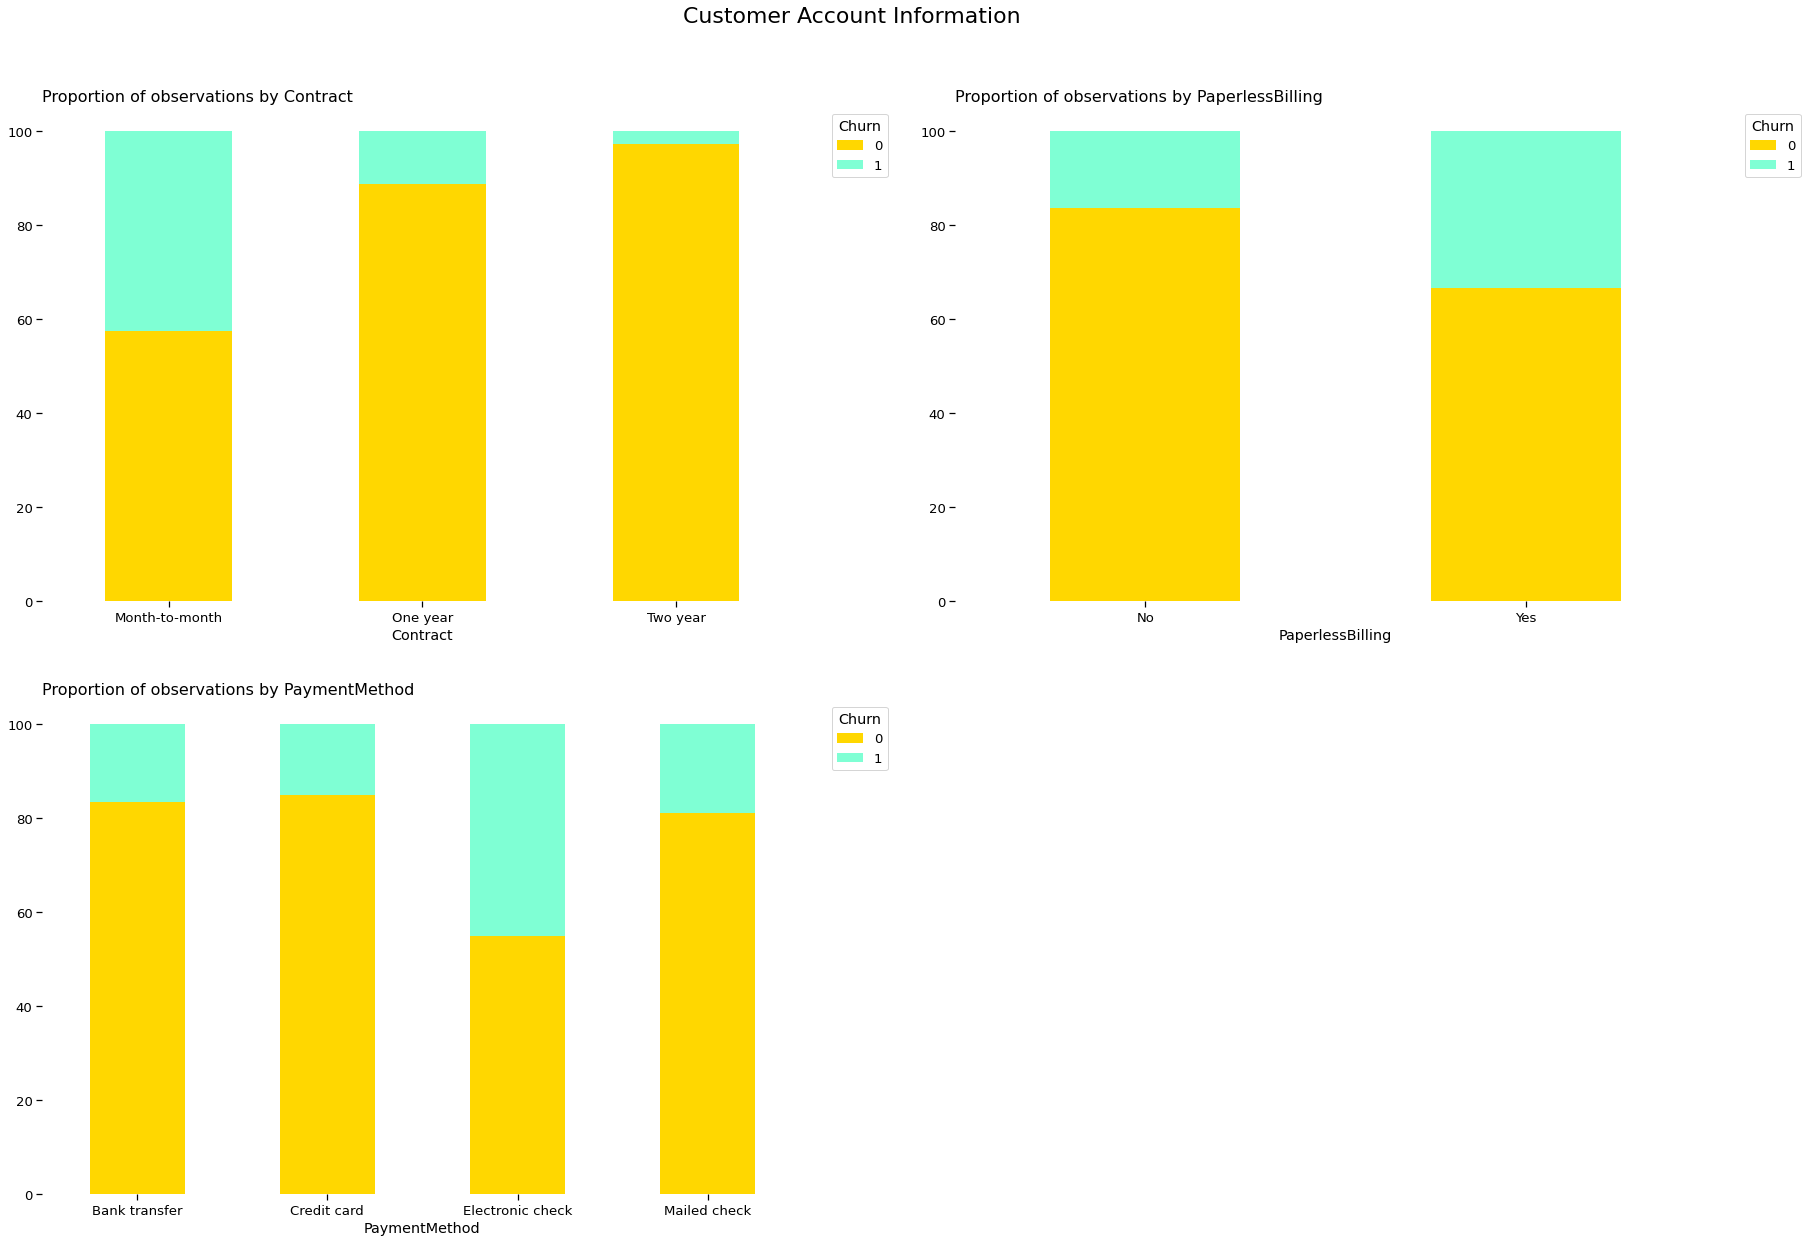

In [23]:
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')

By analyzing customer account information, we can draw the following infos:

- Customers on month-to-month contracts have higher churn rates than clients on annual contracts. I assume people who use month-to-month contracts are people who want to try TELCO's internet service provider so that the churn proportion is higher than other types of contracts. Annual and two-year contract users, according to my assumption, are people who have previously used ISP from TELCO.
- Customers who paid with an electronic check are more likely to stop using internet service provided by TELCO.
- Customers who use paperless billing churn at a higher rate than those who do not.

### 5.3.2 CUSTOMER ACCOUNT INFORMATION -> NUMERICAL VARIABLES

Text(0, 0.5, 'n_customer')

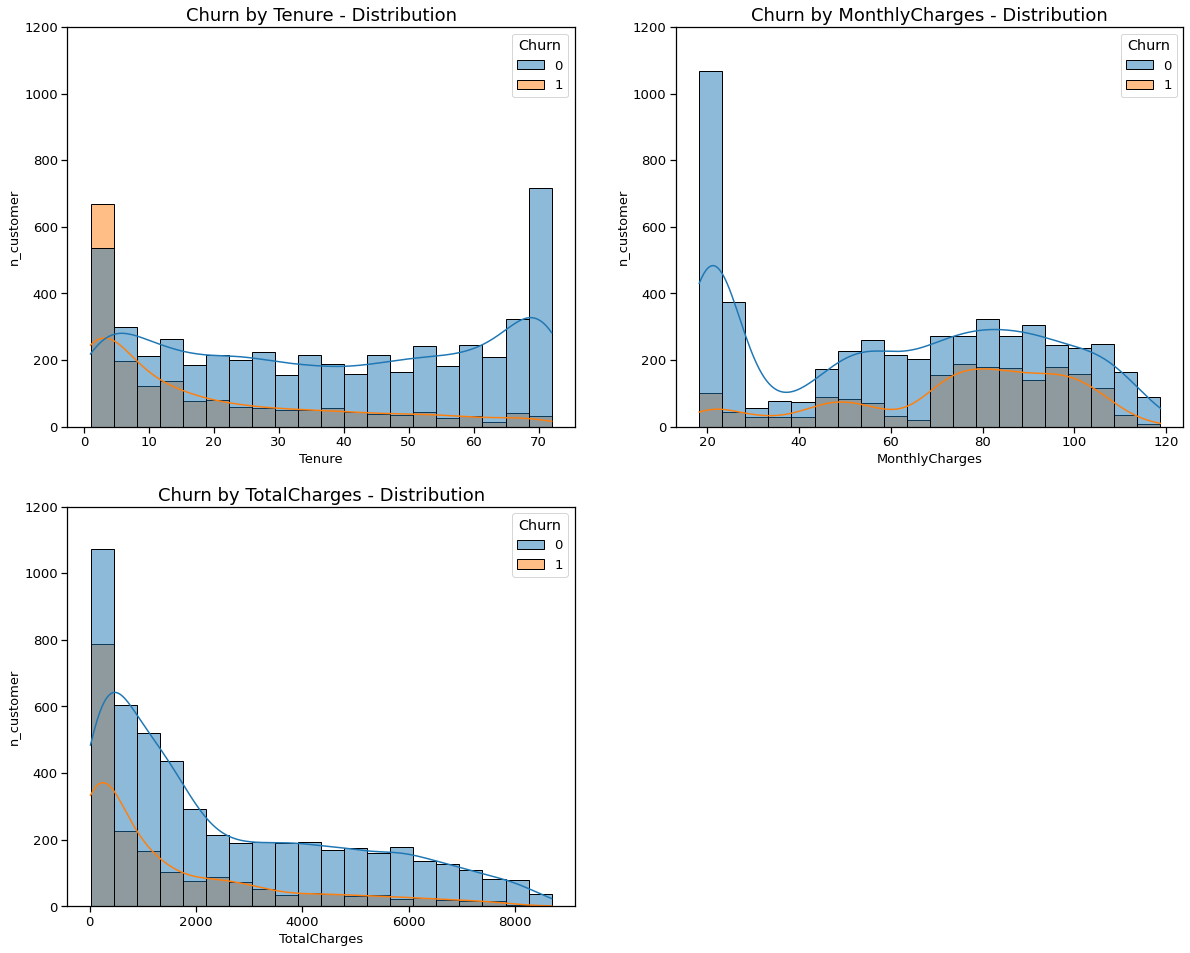

In [24]:
plt.figure(figsize=(20,25))

plt.subplot(321)
sns.histplot(data = df_clean_no_manip, x = "tenure", hue = "Churn", kde = True, bins = 20)
plt.ylim(0,1200)
plt.title("Churn by Tenure - Distribution", fontsize = 18)
plt.xlabel("Tenure",size = 13)
plt.ylabel("n_customer",size = 13)

plt.subplot(322)
sns.histplot(data = df_clean_no_manip, x = "MonthlyCharges", hue = "Churn", kde=True, bins = 20)
plt.ylim(0,1200)
plt.title("Churn by MonthlyCharges - Distribution", fontsize = 18)
plt.xlabel("MonthlyCharges",size = 13)
plt.ylabel("n_customer",size = 13)

plt.subplot(323)
sns.histplot(data = df_clean_no_manip, x = "TotalCharges", hue = "Churn", kde=True, bins = 20)
plt.ylim(0,1200)
plt.title("Churn by TotalCharges - Distribution", fontsize = 18)
plt.xlabel("TotalCharges",size = 13)
plt.ylabel("n_customer",size = 13)

We can extract the following conclusions by analyzing the histograms above:

- The churn rate tends to be larger when monthly charges are high.
- New customers (low tenure) are more likely to churn.
- Clients with high total charges are less likely to stop using the TELCO ISP.

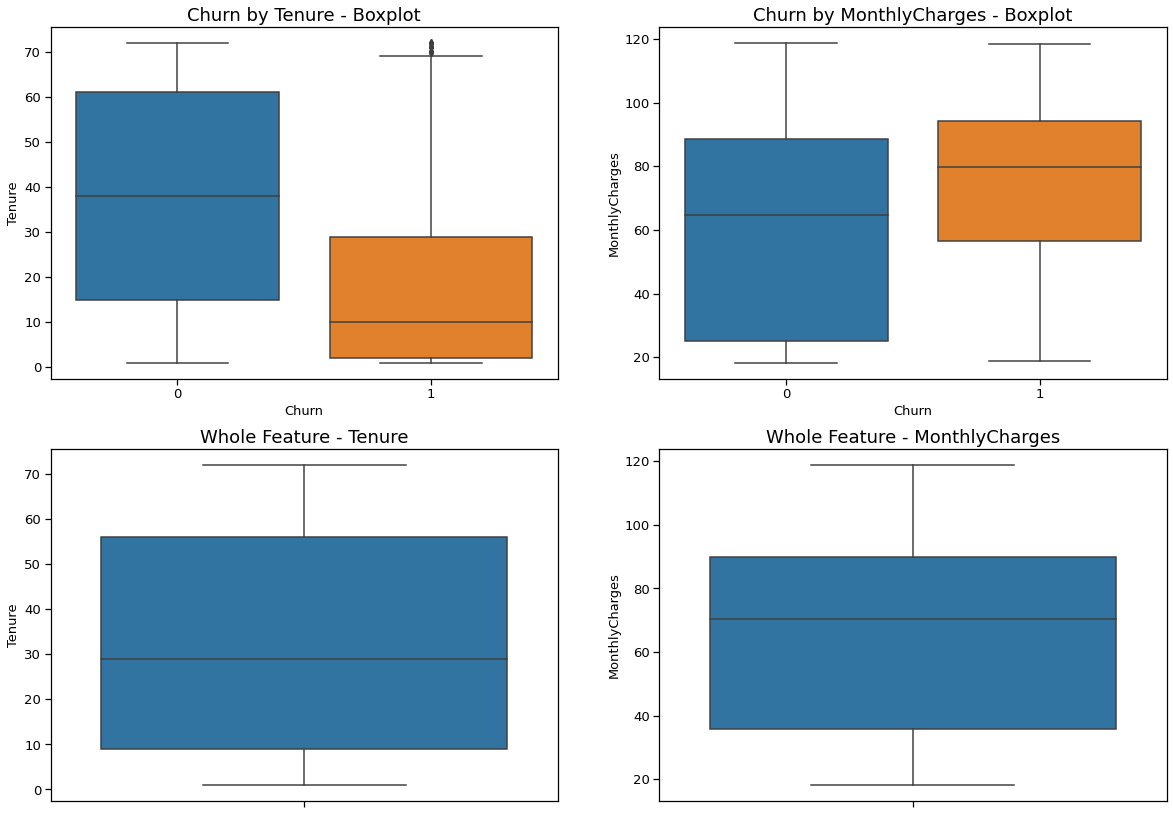

In [25]:
plt.figure(figsize=(20,22))

plt.subplot(323)
sns.boxplot(data = df_clean_no_manip, y ="tenure", x = "Churn")
plt.title("Churn by Tenure - Boxplot",size = 18)
plt.xlabel("Churn",size = 13)
plt.ylabel("Tenure",size = 13)

plt.subplot(324)
sns.boxplot(data = df_clean_no_manip, y = "MonthlyCharges", x = "Churn")
plt.title("Churn by MonthlyCharges - Boxplot",size = 18)
plt.xlabel("Churn",size = 13)
plt.ylabel("MonthlyCharges",size = 13)

plt.subplot(325)
sns.boxplot(data = df_clean_no_manip, y = "tenure")
plt.title("Whole Feature - Tenure",size = 18)
plt.ylabel("Tenure",size = 13)

plt.subplot(326)
sns.boxplot(data = df_clean_no_manip, y = "MonthlyCharges")
plt.title("Whole Feature - MonthlyCharges",size = 18)
plt.ylabel("MonthlyCharges",size = 13)
plt.show()

Here are the insight that I can obtain from the multi graph above:

- From the graph given above, the frequentist test is performed inline with the distribution shown. data on feature tenure & MonthlyCharges does not show a normal distribution pattern (the distribution is not bell shaped).
- For feature tenure & MonthlyCharges there are no outliers, this can be a consideration for selecting the scaling method in the modeling section.
- For feature tenure, as seen from the histplot and boxplot graphs above:

    - There is a pattern that the majority of customers who churn are customers who have subscribed for less than 25 months.
    - It can be seen on the graph that if a customer has subscribed for more than 25 months, the ratio between churn and non-churn customers is getting smaller.
    - For customers who have been subscribing for a long time (indicated by a higher tenure value) I assume they are satisfied with the services provided by TELCO both in terms of value and services provided
    - For new customers who subscribe for less than 25 months, I assume they are not satisfied with the services provided by TELCO because the subscription time is relatively short compared to customers who do not churn. I also assume there is a difference in treatment between previous customers and new customers, because churn mostly occurs in new customers, old customers tend not to churn.

For the MonthlyCharges feature, if you look at the histplot and boxplot graphs above:

- There is a pattern that the majority of customers who churn are customers with relatively high MonthlyCharge ($70 - $100). Even though from the graph it can be seen that the number of those who did not churn were still more than those who did churn. but the ratio between those who churn and those who do not churn is the highest in the price range.
- For the price range of ($20 - $70) and ($110 - $120), the ratio between customer churn and non-customers is relatively small.
- Here I assume that for the price range ($20 - $70) and ($110 - $120) it gives better value than the price range ($70 - $100)

This is just my pure curiosity, I want to see the relationship between Tenure and Monthly Charges with Internet Service using Scatterplot.

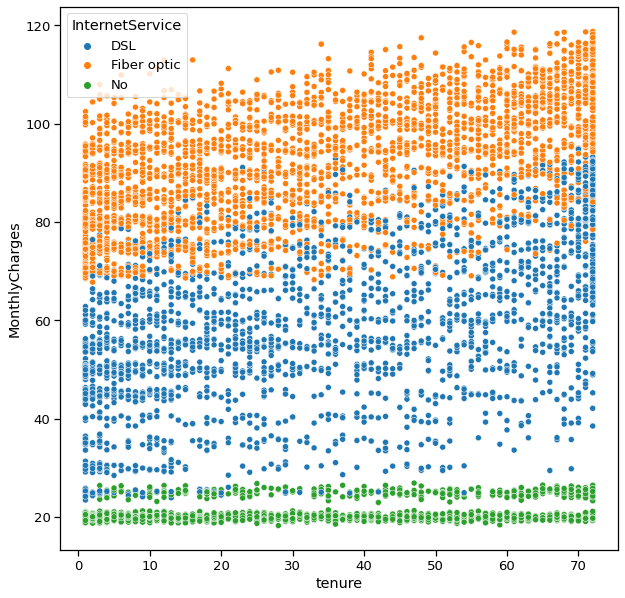

In [26]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = df_clean_no_manip["tenure"], y = df_clean_no_manip["MonthlyCharges"], hue = df_clean_no_manip["InternetService"])
plt.show()

Here are the insight that I can obtain from Internet Service, tenure, and Monthly Charges.

- From the scatterplot above, it can be seen that Fiber Optic products are the products with the highest Monthly Charges compared to 2 other products, namely DSL and Other Services.
- OtherServices products are products with the cheapest MonthlyCharges, and DSL is between fiber optic and OtherServices
- For OtherServices prices tend to be flat, there is no increase in prices from time to time. characterized by low or high tenure, MonthlyCharges are relatively the same.
- For DSL & FiberOptic prices, there is a trend of increasing prices from time to time, although the increase is quite gentle.

Now, I will trind to find the correlation between `tenure`, `MontlyCharges` and `Churn`.

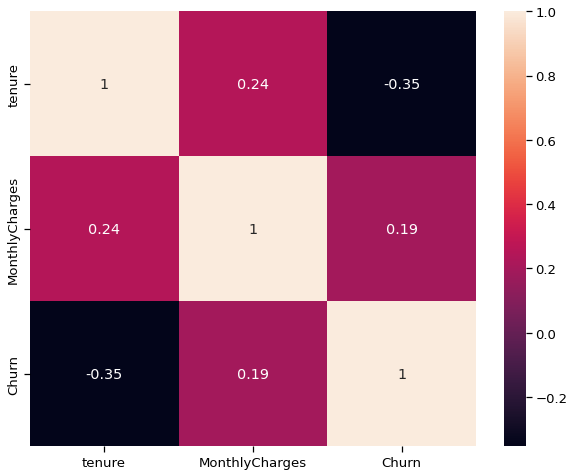

In [27]:
plt.figure(figsize = (10,8))
sns.heatmap(df_clean_copy[['tenure', 'MonthlyCharges', 'Churn']].corr(), annot=True)
plt.show()

Here are the insight that I can obtain from the heatmap above on the numerical features in Customer Account Information

- From the magnitude of the correlation value given, tenure and MonthlyCharge do not have a major effect on the Churn of a customer. The correlation value for each feature is as follows:
     - Tenure to Churn has a negative correlation of -0.35, which means that the longer the subscription, the less likely it is to churn. But the strong correlation between tenure and churn is moderate.
     - MonthlyCharges against Churn has a positive correlation of 0.19, which means that the greater the MonthlyCharges or monthly fees, the higher the probability that the customer will churn.
- Feature tenure & MonthlyCharges also do not show a strong relationship (tends to be weak in the correlation value of 0.24), which means that the longer the subscription, the MonthlyCharges tends to increase.

## 5.4 CHURN PROPORTION IN SERVICES INFORMATION 

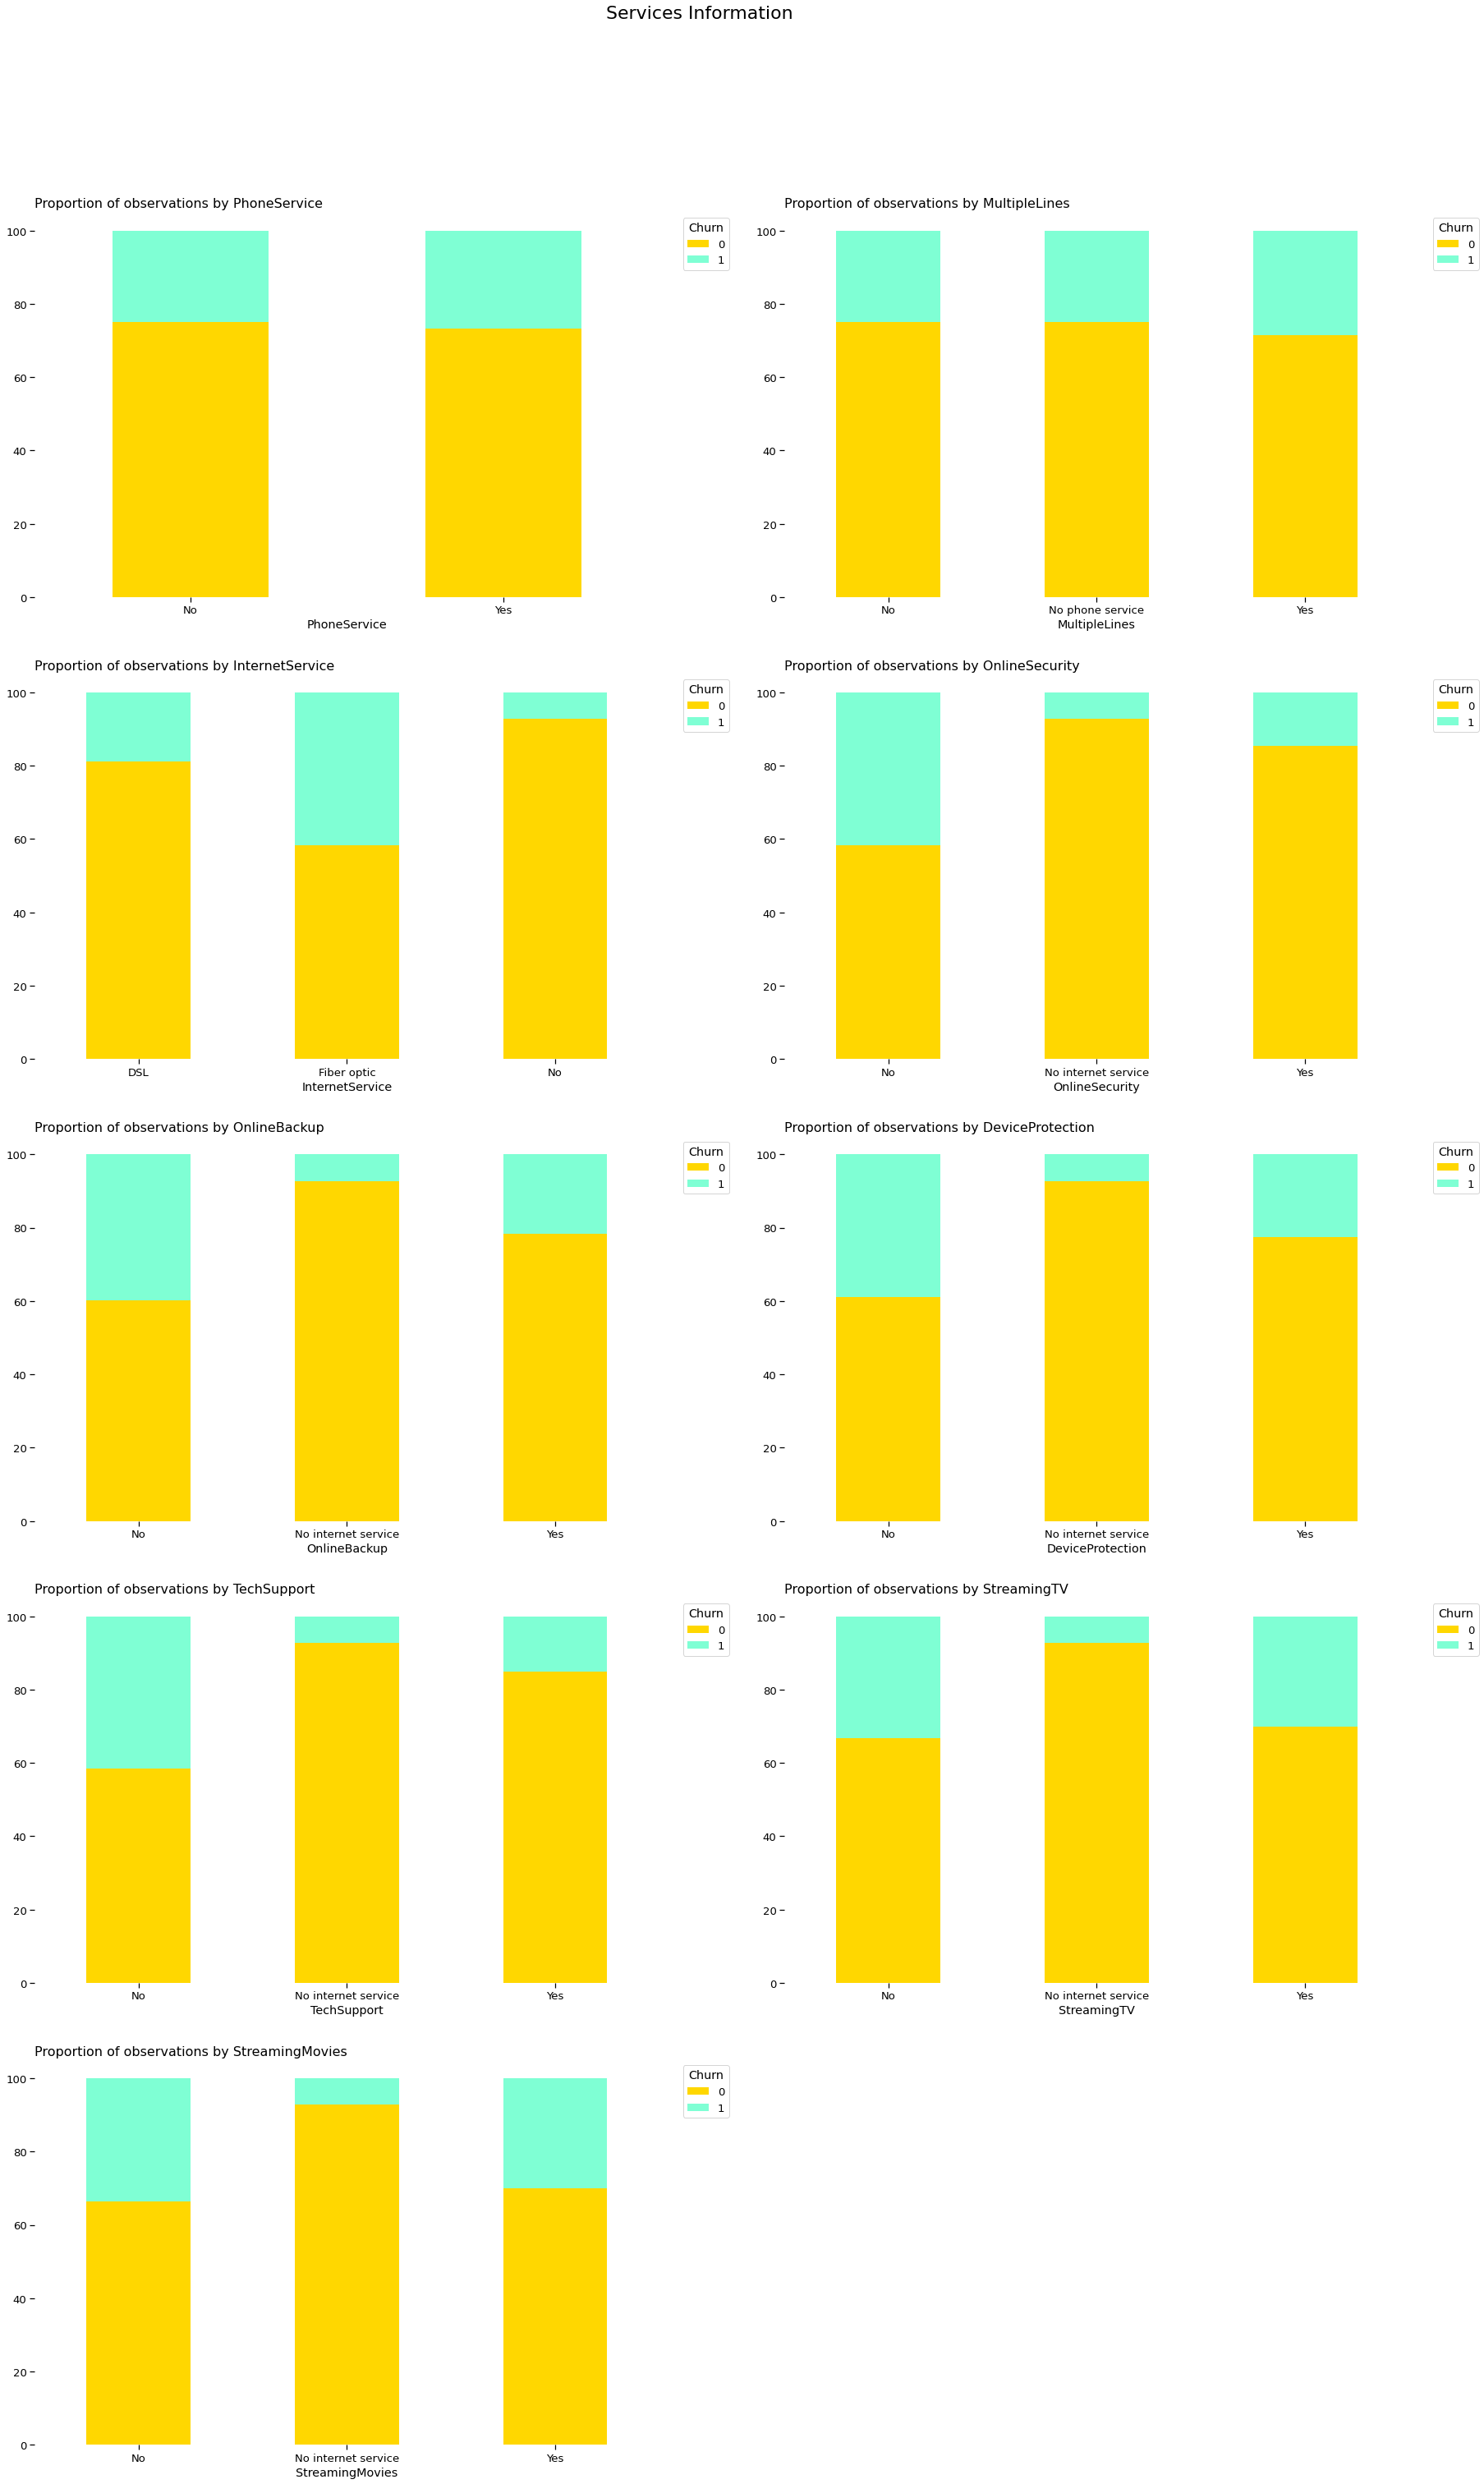

In [28]:
# services column names
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# stacked plot of services columns
percentage_stacked_plot(services_columns, 'Services Information')

We can extract the following conclusions by evaluating services attributes:

- We do not expect phone attributes (PhoneService and MultipleLines) to have significant predictive power. The percentage of churn for all classes in both independent variables is nearly the same.
- Clients with online security churn less than those without it.
- Customers with no tech support tend to churn more often than those with tech support.

About **ONLINE SECURITY**

- Of the TELCO customers who DO NOT subscribe to the additional onlinesecurity feature, 40% of them are churn. This churn ratio is quite high when compared to other categories in online security features.
- This could indicate that there are competitors who can provide additional features in the form of online security, at a more attractive price than TELCO or there are interesting deals related to online security that other competitors can offer to TELCO customers, so that customer churn
- From what has been explained in the previous points, perhaps a step that can be taken to reduce the number of churn is to offer a bundling promo with additional onlinesecurity features to customers (especially from those who have not subscribed to the OnlineSecurity feature, in the hope that some customers will churn to NOT churn. From The graph is for customers who subscribe to additional onlinesecurity features, the churn ratio is relatively small.

About **ONLINE BACKUP**

- From TELCO customers DO NOT subscribe to the onlinebackup additional feature, about 40% of them churn. This churn ratio is quite high when compared to other categories in the online backup feature.
- This can indicate that there are competitors who can provide additional features in the form of online backup, at a more attractive price than TELCO or there are interesting deals related to online backup that other competitors can offer to TELCO customers, resulting in customer churn.

About **DEVICE PROTECTION**

- Out of TELCO customers DO NOT subscribe to the additional DeviceProtection feature, 40% of them churn. This churn ratio is quite high when compared to other categories in the online backup feature.
- This can indicate that there are competitors who can provide additional features in the form of DeviceProtection, at a more attractive price than TELCO or there are interesting deals related to DeviceProtection that other competitors can offer to TELCO customers, so that customers churn.

About **TECH SUPPORT**

- Out of TELCO customers DO NOT subscribe to the additional DeviceProtection feature, about 40% of them churn. This churn ratio is quite high when compared to other categories of TechSupport features.
- This can indicate that there are competitors who can provide additional features in the form of Techsupport, at a more attractive price than TELCO or there are interesting deals related to Techsupport that other competitors can offer to TELCO customers, so that customers churn


# **VI. DATA PREPROCESSING**

In chapter VI, I will perform feature selection to reduce the dimensions of the data that I will use in the machine learning modeling process. Then, I will take some data as an inference model, and after that I will break the data into train data and test data with the proportion of 75% train data and 25% test data. After that, I will do numerical feature scaling and encoding for categorical features. I will not handle outliers because the numerical features to be used do not need to be handled with outliers. In my opinion, because `tenure` is how long someone has used a TELCO ISP and if outliers handling is applied, it will not be in accordance with the existing reality. In fact, there are indeed people who use TELCO ISPs for months or even years. Likewise with `MonthlyCharges`, I see there is a tendency for someone to churn because of high `MonthlyCharges` and if I handle outliers to those high prices, I will lose the data I need. Therefore I will not do outliers handling.

## 6.1 FEATURE SELECTION

interval columns not set, guessing: ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


<AxesSubplot:>

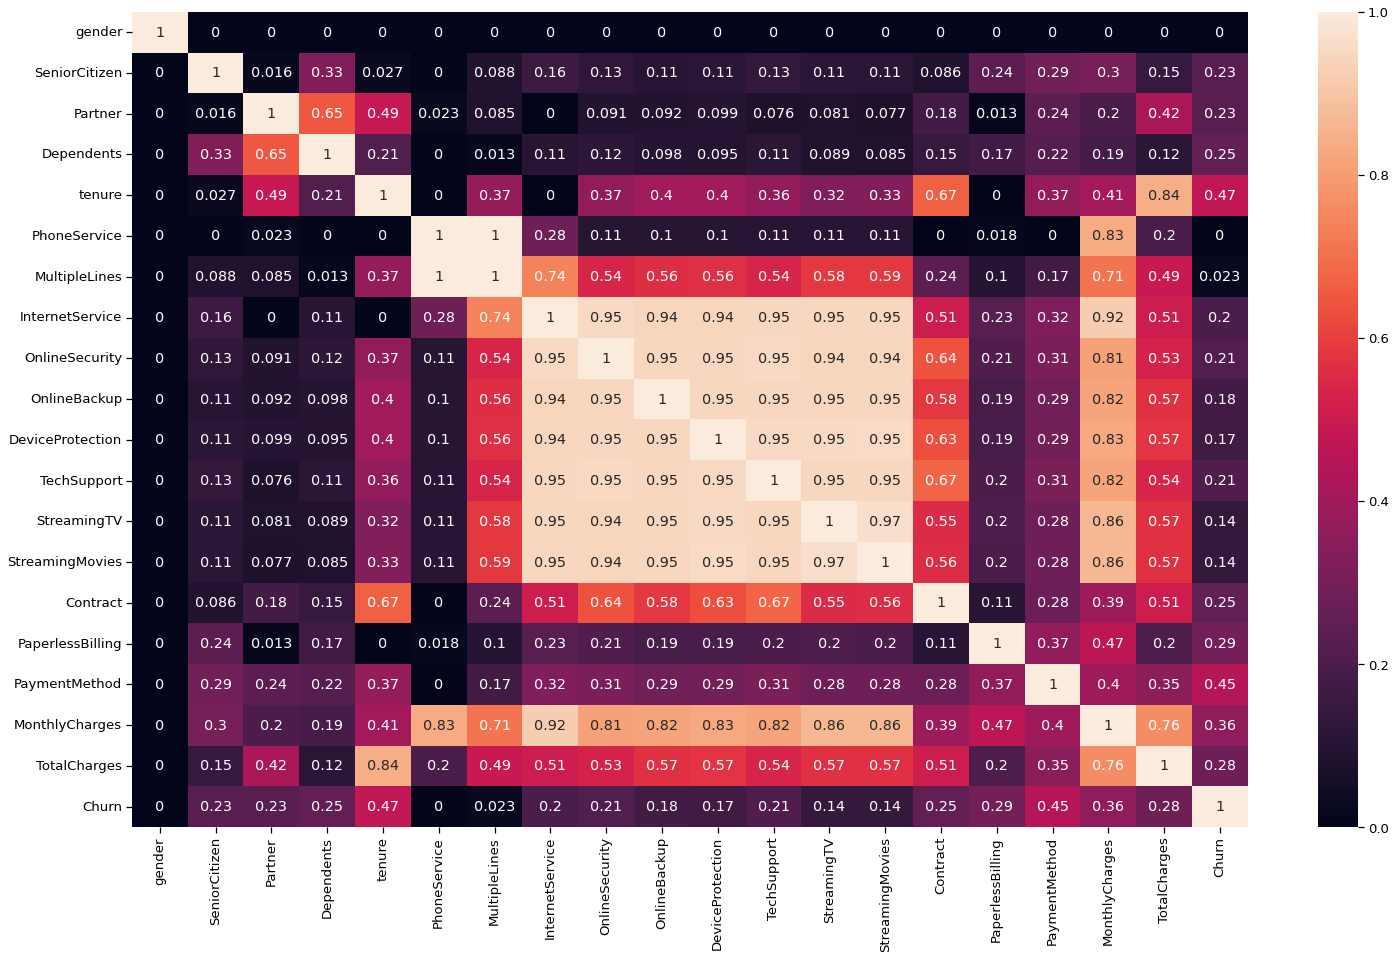

In [29]:
# Setting figure size
fig = plt.figure(figsize = (25, 15))
# Sets heatmap plot
sns.heatmap(df.phik_matrix(),
            vmin = 0,
            vmax = 1,
            annot = True)

Based on the heatmap above, the features that I will use for machine learning modeling are `SeniorCitizen`, `Partner`, `Dependents`, `tenure`, `Contract`, `PaymentMethod` and also `MonthlyCharges`. Here I assume based on the exploratory data analysis that has been done. First, in the `SeniorCitizen` feature, seniors have a greater proportion of churn than non-seniors. In my opinion, this could be because senior people already have better money or financial conditions than non-seniors, so they may want to change their ISP according to their needs. Then, in the `Partner` and `Dependents` features, it can be seen that those who live not alone have a larger proportion of churn compared to those who live alone, this may be due to the need for internet consumption which is getting bigger and more expensive if not living alone. Then, in the `Contract` feature, it can be seen that people who use the 'Month-to-Month' contract system have a higher proportion of churn when compared to the one-year or bi-annual contract system. This could be because the 'Month-to-Month' users are people who are trying a TELCO ISP and are still not using a TELCO ISP. Then, in the `PaymentMethod` feature, we can see that people who use the 'Electronic Check' payment system have a higher churn proportion compared to other payment system methods. I assume that this can be caused because the payment method is still not perfect which then causes TELCO ISP customers to experience difficulties when paying off fees.

In [30]:
df_for_modeling = df.filter(['SeniorCitizen','Partner','Dependents','tenure','OnlineSecurity','Contract','PaymentMethod','MonthlyCharges', 'Churn'], axis=1)
df_for_modeling

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,Contract,PaymentMethod,MonthlyCharges,Churn
0,No,Yes,No,1,No,Month-to-month,Electronic check,29.85,0
1,No,No,No,34,Yes,One year,Mailed check,56.95,0
2,No,No,No,2,Yes,Month-to-month,Mailed check,53.85,1
3,No,No,No,45,Yes,One year,Bank transfer,42.30,0
4,No,No,No,2,No,Month-to-month,Electronic check,70.70,1
...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,24,Yes,One year,Mailed check,84.80,0
7039,No,Yes,Yes,72,No,One year,Credit card,103.20,0
7040,No,Yes,Yes,11,Yes,Month-to-month,Electronic check,29.60,0
7041,Yes,Yes,No,4,No,Month-to-month,Mailed check,74.40,1


## 6.2 INFERENCE MODEL

In this section, I am making an inference model to test out the models that I am going to make later.

In [31]:
data_inf = df_for_modeling.sample(10, random_state=1)
data_inf

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,Contract,PaymentMethod,MonthlyCharges,Churn
1150,No,No,No,41,No,Month-to-month,Electronic check,40.35,0
6767,No,Yes,No,57,Yes,Month-to-month,Electronic check,55.70,0
1322,No,Yes,No,10,No internet service,Month-to-month,Bank transfer,19.95,0
5726,No,Yes,Yes,47,No internet service,Two year,Bank transfer,21.30,0
2753,No,No,No,1,No,Month-to-month,Mailed check,95.65,1
719,Yes,Yes,No,68,No,Month-to-month,Credit card,80.35,0
6504,No,No,No,3,No,Month-to-month,Electronic check,79.25,1
5127,No,No,No,67,Yes,One year,Bank transfer,118.35,1
5514,No,No,No,1,Yes,Month-to-month,Bank transfer,48.45,0
2511,Yes,Yes,No,29,Yes,One year,Bank transfer,90.10,0


And then resetting the original dataset and inference model index.

In [32]:
data_train_test = df_for_modeling.drop(data_inf.index)
data_train_test

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,Contract,PaymentMethod,MonthlyCharges,Churn
0,No,Yes,No,1,No,Month-to-month,Electronic check,29.85,0
1,No,No,No,34,Yes,One year,Mailed check,56.95,0
2,No,No,No,2,Yes,Month-to-month,Mailed check,53.85,1
3,No,No,No,45,Yes,One year,Bank transfer,42.30,0
4,No,No,No,2,No,Month-to-month,Electronic check,70.70,1
...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,24,Yes,One year,Mailed check,84.80,0
7039,No,Yes,Yes,72,No,One year,Credit card,103.20,0
7040,No,Yes,Yes,11,Yes,Month-to-month,Electronic check,29.60,0
7041,Yes,Yes,No,4,No,Month-to-month,Mailed check,74.40,1


And then resetting the original dataset and inference model index.

In [33]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## 6.3 SPLITTING THE DATA

In this section, I will split the data into to variables which is X and y. `y` is my model target which is `Churn`.

In [34]:
X = data_train_test.drop(columns='Churn', axis=1)
y = data_train_test['Churn']
X

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,Contract,PaymentMethod,MonthlyCharges
0,No,Yes,No,1,No,Month-to-month,Electronic check,29.85
1,No,No,No,34,Yes,One year,Mailed check,56.95
2,No,No,No,2,Yes,Month-to-month,Mailed check,53.85
3,No,No,No,45,Yes,One year,Bank transfer,42.30
4,No,No,No,2,No,Month-to-month,Electronic check,70.70
...,...,...,...,...,...,...,...,...
6995,No,Yes,Yes,24,Yes,One year,Mailed check,84.80
6996,No,Yes,Yes,72,No,One year,Credit card,103.20
6997,No,Yes,Yes,11,Yes,Month-to-month,Electronic check,29.60
6998,Yes,Yes,No,4,No,Month-to-month,Mailed check,74.40


Next step that I will perform is, splitting `X` into two subset data which is `train` and `test`. The portion is 75 % train and 25 % test.

In [35]:
train, test = train_test_split(data_train_test, test_size=0.25, stratify=y, random_state=1)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (5250, 9)
Test size:  (1750, 9)


In [36]:
X_train = train.drop(columns='Churn')
y_train = train['Churn']

X_test = test.drop(columns='Churn')
y_test = test['Churn']

### 6.3.1 SPLITTING NUMERICAL AND CATEGORICAL FEATURES

Splitting between numerical and categorical features needs to be done because I want to scale the numerical features. Fortunately, the categorical features is already represented in numerical values, so I won't be needing any encoding the categorical features.

In [37]:
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
cat_columns = X_train.select_dtypes(include=['object']).columns.to_list()

print('Numerical Features:', num_columns)
print('Categorical Features:', cat_columns)

Numerical Features: ['tenure', 'MonthlyCharges']
Categorical Features: ['SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'Contract', 'PaymentMethod']


In [38]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

## 6.4 SCALING NUMERICAL FEATURES

I will scale the numerical features by using MinMaxScaler because the numerical features are skewed. You may ask why don't I handle the outliers in those numerical features, the answer is, in my opinion, those outliers don't need to handled because it will not represent the actual fact of the data and doesn't inline with the data context.

In [39]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.66197183, 0.72546089],
       [0.        , 0.01943199],
       [0.22535211, 0.46287992],
       ...,
       [0.09859155, 0.45690085],
       [0.09859155, 0.51270553],
       [0.52112676, 0.82610862]])

## 6.5 ENCODING CATEGORICAL FEATURES

The encoding process will be done by using OneHotEncoder from the sklearn library.

In [40]:
encoder = OneHotEncoder()
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat).toarray()
X_test_cat_enc = encoder.transform(X_test_cat).toarray()

X_train_cat_enc

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

## 6.6 CONCATENATING NUMERICAL AND CATEGORICAL FEATURES

After scaling the numerical features, I will concantenate all those features back in one piece.

In [41]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_enc], axis=1)

X_train_final

array([[0.66197183, 0.72546089, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.01943199, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.22535211, 0.46287992, 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.09859155, 0.45690085, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.09859155, 0.51270553, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.52112676, 0.82610862, 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [42]:
X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.661972,0.725461,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.019432,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.225352,0.462880,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.690141,0.264574,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.126761,0.014948,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,0.000000,0.018934,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5246,0.647887,0.667165,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5247,0.098592,0.456901,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5248,0.098592,0.512706,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
y_train

2371    0
2020    1
29      1
3908    0
4171    0
       ..
4350    0
5881    1
3132    0
3628    0
2209    0
Name: Churn, Length: 5250, dtype: int64

## 6.7 IMBALANCED TARGET DATA HANDLING

As I have mentioned in the beginning of EDA, the classes in the target is imbalanced. therefore to overcome that problem, I will use SMOTENC to resampling the data and make the classes in the target balanced.

In [44]:
# indeces of the columns of categorical variables
smnc = SMOTENC(sampling_strategy='auto', random_state=1, categorical_features=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])

In [45]:
# Resampling fit
X_train_final_smnc, y_train_smnc = smnc.fit_resample(X_train_final, y_train)

In [46]:
# Showing counter values
counter = Counter(y_train_smnc)
print(counter)

Counter({0: 3859, 1: 3859})


# **VII. MACHINE LEARNING MODELS**

In this section, I will make some classifier model. To analyze the models performance, I will use recall score from each model and do a cross validation with scoring system of 'accuracy'. I will explain it later in this section.

## 7.1 LOGISTIC REGRESSION

### 7.1.1 MODEL DEFINITION

In [47]:
log_model = LogisticRegression()

### 7.1.2 MODEL TRAINING

In [48]:
log_model.fit(X_train_final_smnc, y_train_smnc)

LogisticRegression()

### 7.1.3 MODEL EVALUATION

In [49]:
y_pred_train_log = log_model.predict(X_train_final_smnc)
y_pred_test_log = log_model.predict(X_test_final)
print('Accuracy Score Train:', accuracy_score(y_train_smnc, y_pred_train_log))

Accuracy Score Train: 0.766778958279347


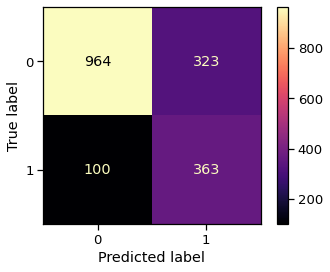

In [50]:
cm = confusion_matrix(y_test, y_pred_test_log, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)

disp.plot(cmap='magma')
plt.show()

Okay, now I will explain how to interpret the image shown above. The image above is called the confusion matrix.

The confusion matrix is ​​divided into 4 parts, namely **true positive, false positive, false negative, and true negative**. The Y axis of the confusion matrix is ​​the original or true label, while the X axis of the confusion matrix is ​​the class prediction result. 

- True positive is a positive label, or **in this case the label 0 represents 'No Churn / Customer', which the model predicts as a positive label**.

- Then, the false positive is **the 'Churn / Customer' that the model predicts as the 'Churn / Not Customer'**.

- Then, false negative is **the 'Churn / Not Customer' class which is predicted as 'No Churn / Customer' by the model**.

- And the last is **true negative where the 'Churn / Not Customer' label is predicted by the model as the 'Churn / Not Customer' label**.

In [51]:
print("="*27,"TRAINING","="*27)
print(classification_report(y_train_smnc, y_pred_train_log, zero_division=0))
print('Accuracy Score Train: ',accuracy_score(y_train_smnc, y_pred_train_log))

print("\n")
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_test_log, zero_division=0))
print('Accuracy Score Test: ',accuracy_score(y_test, y_pred_test_log))


=========================== TRAINING ===========================
              precision    recall  f1-score   support

           0       0.79      0.72      0.76      3859
           1       0.75      0.81      0.78      3859

    accuracy                           0.77      7718
   macro avg       0.77      0.77      0.77      7718
weighted avg       0.77      0.77      0.77      7718

Accuracy Score Train:  0.766778958279347


============================== TEST ==============================
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1287
           1       0.53      0.78      0.63       463

    accuracy                           0.76      1750
   macro avg       0.72      0.77      0.73      1750
weighted avg       0.81      0.76      0.77      1750

Accuracy Score Test:  0.7582857142857143


Alright, moving on to the next part. Above is what is so called as classification report. The report consists of precision, recall, and f1-score, support, and accuracy.

- Accuracy is the number of correctly predicted data points out of all the data points.
- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
- Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
- F1 Score is the weighted average of Precision and Recall.

Then which metric will be emphasized or used as the main metric as an evaluator of the model? Yes, the answer is recall. Why recall you may ask? As I have mentioned above, recall is the ratio of correctly predicted positive observation to the all observation in actual class. Here is the formula of recall :

**Recall = TruePositives / (TruePositives + FalseNegatives)**

I will explain according to the context of the current data. Imagine that we are part of TELCO, so we see it from the TELCO's point of view. We want to keep our customers in our ecosystem. Why so? As explained earlier, the costs needed to find or get new customers will be higher than if we try to retain our loyal customers. Or in other words, we will cut our revenue to get new customers, whereas if we retain our loyal customers, we can get more profit if we are smart in managing marketing strategies.

Then, I came up with a machine learning model that can predict whether someone will churn or not. As a human being, I certainly am not free from mistakes, which means that my machine learning model is definitely not perfect. Therefore, we need to look at the prediction results. We know that our customers have 2 types, namely churn and non-churn. We will try to keep customers from churning. Then if the churn customer is predicted as a non-churn customer, of course this will endanger us as marketing or the TELCO team, we will lose the customer we should retain.

Therefore, I will use the recall evaluation metric to review whether my model is considered good or not.



The interpretations that can be obtained from the classification report test data above are:

- Precision: of all the people predicted to churn by the model, 53 % were correct.
- Recall : of all people that is churning, the model only predicted this outcome correctly for 78% of those people.
- F-1 Score: tells how accurate the model has been because the closer the F-1 value is, the more accurate the model will be. In this case, the logistic regression model that has been made has a score of 0.63 of 1.00. A good model but still needs some improvements.

Based on the F-1 Score, it can indicate that my logistic regression model does not have good accuracy. This can be caused by several things, such as the lack of data, insufficient data range and also the data pattern of the features used. But, in this case mostly because the lack of data. This data only has almost 300 entries.

Note:
- Support : These values simply tell us how many poeple belonged to each class in the test dataset. We can see that among the people in the test dataset, 1287 people are not churn and 463 people are churn.

To make it more consistent, I will do a cross validation check to train and test prediction. Cross-validation (CV) is a statistical method that can be used to evaluate the performance of a model or algorithm where the data is separated into two subsets, namely learning process data and validation / evaluation data.

In [52]:
kfold = StratifiedKFold(n_splits=10)
lr_train_cross_val = cross_val_score(log_model, X_train_final_smnc, y_train_smnc, cv=kfold, scoring='accuracy')
lr_test_cross_val = cross_val_score(log_model, X_test_final, y_test, cv=kfold, scoring='accuracy')

print("="*27,"CROSS-VAL TRAINING","="*27)
print('Accuracy - All - Cross Validation  : ', lr_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', lr_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', lr_train_cross_val.std())
print('Accuracy - Range of Train Set       : ', (lr_train_cross_val.mean()-lr_train_cross_val.std()) , '-', (lr_train_cross_val.mean()+lr_train_cross_val.std()))
print("\n")
print("="*30,"CROSS-VAL TEST","="*30)
print('Accuracy - All - Cross Validation  : ', lr_test_cross_val)
print('Accuracy - Mean - Cross Validation : ', lr_test_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', lr_test_cross_val.std())
print('Accuracy - Range of test Set       : ', (lr_test_cross_val.mean()-lr_test_cross_val.std()) , '-', (lr_test_cross_val.mean()+lr_test_cross_val.std()))

=========================== CROSS-VAL TRAINING ===========================
Accuracy - All - Cross Validation  :  [0.75259067 0.74222798 0.76683938 0.76295337 0.77849741 0.77590674
 0.75777202 0.77590674 0.77172503 0.76264591]
Accuracy - Mean - Cross Validation :  0.7647065247340443
Accuracy - Std - Cross Validation  :  0.01096527400862172
Accuracy - Range of Train Set       :  0.7537412507254226 - 0.775671798742666


============================== CROSS-VAL TEST ==============================
Accuracy - All - Cross Validation  :  [0.78857143 0.76571429 0.79428571 0.77142857 0.79428571 0.81142857
 0.81714286 0.72571429 0.84571429 0.77142857]
Accuracy - Mean - Cross Validation :  0.7885714285714286
Accuracy - Std - Cross Validation  :  0.031193929289042695
Accuracy - Range of test Set       :  0.7573774992823858 - 0.8197653578604713


From 10 folds of cross validation, the average train prediction accuracy is 0.76 which is the same as the accuracy written in classification report. The average test prediction accuracy is 0.78 which is higher 3% than the accuracy written in classification report. Both of the train and test accuracy is not significantly different.

## 7.2 SVM

### 7.2.1 MODEL DEFINITION

In [53]:
svm_model = SVC(probability=True, random_state=1)

### 7.2.2 MODEL TRAINING

In [54]:
svm_model.fit(X_train_final_smnc, y_train_smnc)

SVC(probability=True, random_state=1)

### 7.2.3 MODEL EVALUATION

In [55]:
y_pred_train_svm = svm_model.predict(X_train_final_smnc)
y_pred_test_svm = svm_model.predict(X_test_final)
print('Accuracy Score Train:', accuracy_score(y_train_smnc, y_pred_train_svm))

Accuracy Score Train: 0.7816791915003887


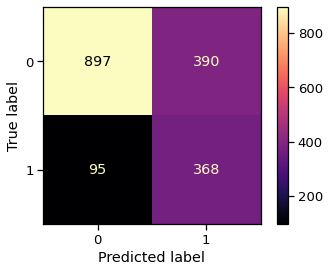

In [56]:
cm = confusion_matrix(y_test, y_pred_test_svm, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)

disp.plot(cmap='magma')
plt.show()

Based on the SVM model that has been made, the confusion matrix obtained says that **there are 897 data that are predicted to be NonChurn, there are 390 data of NonChurn that are predicted to be Churn. Then there are 95 data of Churn which are predicted as NonChurn and 368 data of Churn which are predicted to be correct as Churn.**

In [57]:


print("="*27,"TRAINING","="*27)
print(classification_report(y_train_smnc, y_pred_train_svm, zero_division=0))
print('Accuracy Score Train:', accuracy_score(y_train_smnc, y_pred_train_svm))

print("\n")
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_test_svm, zero_division=0))
print('Accuracy Score Train:', accuracy_score(y_test, y_pred_test_svm))


=========================== TRAINING ===========================
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      3859
           1       0.75      0.85      0.80      3859

    accuracy                           0.78      7718
   macro avg       0.79      0.78      0.78      7718
weighted avg       0.79      0.78      0.78      7718

Accuracy Score Train: 0.7816791915003887


============================== TEST ==============================
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1287
           1       0.49      0.79      0.60       463

    accuracy                           0.72      1750
   macro avg       0.69      0.75      0.69      1750
weighted avg       0.79      0.72      0.74      1750

Accuracy Score Train: 0.7228571428571429


The interpretations that can be obtained from the classification report test data above are:

- Precision: of all the people predicted to churn by the model, 49 % were correct.
- Recall : of all people that is churning, the model only predicted this outcome correctly for 79% of those people.
- F-1 Score: tells how accurate the model has been because the closer the F-1 value is, the more accurate the model will be. In this case, the SVM model that has been made has a score of 0.60 of 1.00. A good model but still needs some improvements.

In [58]:
svm_test_cross_val = cross_val_score(svm_model, X_test_final, y_test, cv=kfold, scoring='accuracy')
print("\n")
print("="*30,"CROSS-VAL TEST","="*30)
print('Accuracy - All - Cross Validation  : ', svm_test_cross_val)
print('Accuracy - Mean - Cross Validation : ', svm_test_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', svm_test_cross_val.std())
print('Accuracy - Range of test Set       : ', (svm_test_cross_val.mean()-svm_test_cross_val.std()) , '-', (svm_test_cross_val.mean()+svm_test_cross_val.std()))



============================== CROSS-VAL TEST ==============================
Accuracy - All - Cross Validation  :  [0.8        0.79428571 0.77714286 0.76571429 0.8        0.78857143
 0.78857143 0.69142857 0.83428571 0.76571429]
Accuracy - Mean - Cross Validation :  0.7805714285714286
Accuracy - Std - Cross Validation  :  0.03515098628395362
Accuracy - Range of test Set       :  0.745420442287475 - 0.8157224148553822


From 10 folds of cross validation, The average test prediction accuracy is 0.78 which is higher 6% than the accuracy written in classification report. Test accuracy is not significantly different.

## 7.3 GRADIENT BOOSTING CLASSIFIER

### 7.3.1 MODEL DEFINITION

In [59]:
gbc = GradientBoostingClassifier(random_state=1)

### 7.3.2 MODEL TRAINING

In [60]:
gbc.fit(X_train_final_smnc, y_train_smnc)

GradientBoostingClassifier(random_state=1)

### 7.3.3 MODEL EVALUATION

In [61]:
y_pred_train_gbc = gbc.predict(X_train_final_smnc)
y_pred_test_gbc = gbc.predict(X_test_final)
print('Accuracy Score Train:', accuracy_score(y_train_smnc, y_pred_train_gbc))

Accuracy Score Train: 0.8011142783104431


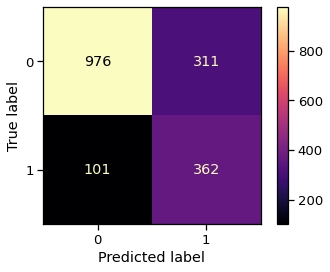

In [62]:
cm = confusion_matrix(y_test, y_pred_test_gbc, labels=gbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbc.classes_)

disp.plot(cmap='magma')
plt.show()

Based on the Gradient Boosting model that has been made, the confusion matrix obtained says that **there are 976 data that are predicted to be NonChurn, there are 311 data of NonChurn that are predicted to be Churn. Then there are 101 data of Churn which are predicted as NonChurn and 362 data of Churn which are predicted to be correct as Churn.**

In [63]:
print("="*27,"TRAINING","="*27)
print(classification_report(y_train_smnc, y_pred_train_gbc, zero_division=0))
print('Accuracy Score Train:', accuracy_score(y_train_smnc, y_pred_train_gbc))

print("\n")
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_test_gbc, zero_division=0))
print('Accuracy Score Train:', accuracy_score(y_test, y_pred_test_gbc))

=========================== TRAINING ===========================
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      3859
           1       0.78      0.85      0.81      3859

    accuracy                           0.80      7718
   macro avg       0.80      0.80      0.80      7718
weighted avg       0.80      0.80      0.80      7718

Accuracy Score Train: 0.8011142783104431


============================== TEST ==============================
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1287
           1       0.54      0.78      0.64       463

    accuracy                           0.76      1750
   macro avg       0.72      0.77      0.73      1750
weighted avg       0.81      0.76      0.78      1750

Accuracy Score Train: 0.7645714285714286


The interpretations that can be obtained from the classification report test data above are:

- Precision: of all the people predicted to churn by the model, 54 % were correct.
- Recall : of all people that is churning, the model only predicted this outcome correctly for 78% of those people.
- F-1 Score: tells how accurate the model has been because the closer the F-1 value is, the more accurate the model will be. In this case, the Gradient Boosting model that has been made has a score of 0.64 of 1.00. A good model but still needs some improvements.

In [64]:
kfold = StratifiedKFold(n_splits=10)
gbc_train_cross_val = cross_val_score(gbc, X_train_final_smnc, y_train_smnc, cv=kfold, scoring='accuracy')
gbc_test_cross_val = cross_val_score(gbc, X_test_final, y_test, cv=kfold, scoring='accuracy')

print("="*27,"CROSS-VAL TRAIN","="*27)
print('Accuracy - All - Cross Validation  : ', gbc_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', gbc_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', gbc_train_cross_val.std())
print('Accuracy - Range of Train Set       : ', (gbc_train_cross_val.mean()-gbc_train_cross_val.std()) , '-', (gbc_train_cross_val.mean()+gbc_train_cross_val.std()))
print("\n")
print("="*30,"CROSS-VAL TEST","="*30)
print('Accuracy - All - Cross Validation  : ', gbc_test_cross_val)
print('Accuracy - Mean - Cross Validation : ', gbc_test_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', gbc_test_cross_val.std())
print('Accuracy - Range of test Set       : ', (gbc_test_cross_val.mean()-gbc_test_cross_val.std()) , '-', (gbc_test_cross_val.mean()+gbc_test_cross_val.std()))

=========================== CROSS-VAL TRAIN ===========================
Accuracy - All - Cross Validation  :  [0.78367876 0.75       0.77202073 0.77072539 0.80958549 0.79404145
 0.77720207 0.80699482 0.79896239 0.78858625]
Accuracy - Mean - Cross Validation :  0.7851797342795508
Accuracy - Std - Cross Validation  :  0.017427656637221307
Accuracy - Range of Train Set       :  0.7677520776423294 - 0.8026073909167721


============================== CROSS-VAL TEST ==============================
Accuracy - All - Cross Validation  :  [0.76571429 0.80571429 0.81142857 0.77714286 0.81142857 0.81714286
 0.81142857 0.72571429 0.82285714 0.77714286]
Accuracy - Mean - Cross Validation :  0.7925714285714285
Accuracy - Std - Cross Validation  :  0.029030596104869785
Accuracy - Range of test Set       :  0.7635408324665587 - 0.8216020246762983


From 10 folds of cross validation, the average train prediction accuracy is 0.78 which is 4% lower than the accuracy written in classification report. The average test prediction accuracy is 0.79 which is higher 3% than the accuracy written in classification report. Both of the train and test accuracy is not significantly different.

## 7.4 XGBOOST CLASSIFIER

### 7.4.1 MODEL DEFINITION

In [65]:
xgb = XGBClassifier(random_state=1)

### 7.4.2 MODEL TRAINING

In [66]:
xgb.fit(X_train_final_smnc, y_train_smnc)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

### 7.4.3 MODEL EVALUATION

In [67]:
y_pred_train_xgb = xgb.predict(X_train_final_smnc)
y_pred_test_xgb = xgb.predict(X_test_final)
print('Accuracy Score Train:', accuracy_score(y_train_smnc, y_pred_train_xgb))

Accuracy Score Train: 0.925369266649391


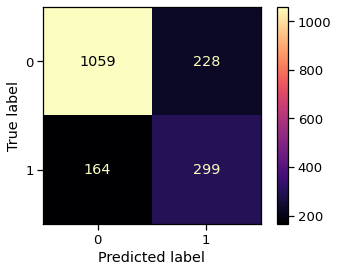

In [68]:
cm = confusion_matrix(y_test, y_pred_test_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)

disp.plot(cmap='magma')
plt.show()

Based on the XGBoosting model that has been made, the confusion matrix obtained says that **there are 1059 data that are predicted to be NonChurn, there are 228 data of NonChurn that are predicted to be Churn. Then there are 164 data of Churn which are predicted as NonChurn and 299 data of Churn which are predicted to be correct as Churn.**

In [69]:
print("="*27,"TRAINING","="*27)
print(classification_report(y_train_smnc, y_pred_train_xgb, zero_division=0))
print('Accuracy Score Train:', accuracy_score(y_train_smnc, y_pred_train_xgb))

print("\n")
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_test_xgb, zero_division=0))
print('Accuracy Score Train:', accuracy_score(y_test, y_pred_test_xgb))

=========================== TRAINING ===========================
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3859
           1       0.91      0.95      0.93      3859

    accuracy                           0.93      7718
   macro avg       0.93      0.93      0.93      7718
weighted avg       0.93      0.93      0.93      7718

Accuracy Score Train: 0.925369266649391


============================== TEST ==============================
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1287
           1       0.57      0.65      0.60       463

    accuracy                           0.78      1750
   macro avg       0.72      0.73      0.72      1750
weighted avg       0.79      0.78      0.78      1750

Accuracy Score Train: 0.776


The interpretations that can be obtained from the classification report test data above are:

- Precision: of all the people predicted to churn by the model, 57 % were correct.
- Recall : of all people that is churning, the model only predicted this outcome correctly for 65% of those people.
- F-1 Score: tells how accurate the model has been because the closer the F-1 value is, the more accurate the model will be. In this case, the XGBoosting model that has been made has a score of 0.60 of 1.00. A good model but still needs some improvements.

In [70]:
kfold = StratifiedKFold(n_splits=10)
xgb_train_cross_val = cross_val_score(xgb, X_train_final_smnc, y_train_smnc, cv=kfold, scoring='accuracy')
xgb_test_cross_val = cross_val_score(xgb, X_test_final, y_test, cv=kfold, scoring='accuracy')

print("="*27,"CROSS-VAL TRAIN","="*27)
print('Accuracy - All - Cross Validation  : ', xgb_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', xgb_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', xgb_train_cross_val.std())
print('Accuracy - Range of Train Set       : ', (xgb_train_cross_val.mean()-xgb_train_cross_val.std()) , '-', (xgb_train_cross_val.mean()+xgb_train_cross_val.std()))
print("\n")
print("="*30,"CROSS-VAL TEST","="*30)
print('Accuracy - All - Cross Validation  : ', xgb_test_cross_val)
print('Accuracy - Mean - Cross Validation : ', xgb_test_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', xgb_test_cross_val.std())
print('Accuracy - Range of test Set       : ', (xgb_test_cross_val.mean()-xgb_test_cross_val.std()) , '-', (xgb_test_cross_val.mean()+xgb_test_cross_val.std()))

=========================== CROSS-VAL TRAIN ===========================
Accuracy - All - Cross Validation  :  [0.76295337 0.73316062 0.75777202 0.79274611 0.87953368 0.85751295
 0.85492228 0.86398964 0.84176394 0.87548638]
Accuracy - Mean - Cross Validation :  0.8219840997829344
Accuracy - Std - Cross Validation  :  0.051990063622229944
Accuracy - Range of Train Set       :  0.7699940361607045 - 0.8739741634051643


============================== CROSS-VAL TEST ==============================
Accuracy - All - Cross Validation  :  [0.76571429 0.79428571 0.78857143 0.73714286 0.76       0.79428571
 0.77714286 0.74857143 0.77142857 0.73142857]
Accuracy - Mean - Cross Validation :  0.7668571428571428
Accuracy - Std - Cross Validation  :  0.021502728825402037
Accuracy - Range of test Set       :  0.7453544140317407 - 0.7883598716825448


From 10 folds of cross validation, the average train prediction accuracy is 0.82 which is 10% lower than the accuracy written in classification report. The average test prediction accuracy is 0.76 which is higher 1% than the accuracy written in classification report. Train accuracy is significantly different due to the model is overfitting (my assumption).

## 7.5 ADABOOST CLASSIFIER

### 7.5.1 MODEL DEFINITION

In [71]:
adb = AdaBoostClassifier(random_state=1)

### 7.5.2 MODEL TRAINING

In [72]:
adb.fit(X_train_final_smnc, y_train_smnc)

AdaBoostClassifier(random_state=1)

### 7.5.3 MODEL EVALUATION

In [73]:
y_pred_train_adb = adb.predict(X_train_final_smnc)
y_pred_test_adb = adb.predict(X_test_final)
print('Accuracy Score Train:', accuracy_score(y_train_smnc, y_pred_train_adb))

Accuracy Score Train: 0.7783104431199793


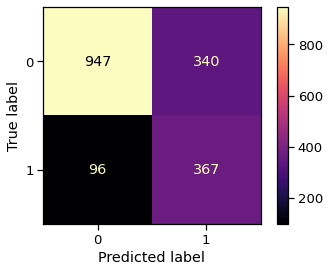

In [74]:
cm = confusion_matrix(y_test, y_pred_test_adb, labels=adb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adb.classes_)

disp.plot(cmap='magma')
plt.show()

Based on the AdaBoosting model that has been made, the confusion matrix obtained says that **there are 947 data that are predicted to be NonChurn, there are 340 data of NonChurn that are predicted to be Churn. Then there are 96 data of Churn which are predicted as NonChurn and 367 data of Churn which are predicted to be correct as Churn.**

In [75]:
print("="*27,"TRAINING","="*27)
print(classification_report(y_train_smnc, y_pred_train_adb, zero_division=0))
print('Accuracy Score Train:', accuracy_score(y_train_smnc, y_pred_train_adb))

print("\n")
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_test_adb, zero_division=0))
print('Accuracy Score Train:', accuracy_score(y_test, y_pred_test_adb))

=========================== TRAINING ===========================
              precision    recall  f1-score   support

           0       0.81      0.72      0.77      3859
           1       0.75      0.83      0.79      3859

    accuracy                           0.78      7718
   macro avg       0.78      0.78      0.78      7718
weighted avg       0.78      0.78      0.78      7718

Accuracy Score Train: 0.7783104431199793


============================== TEST ==============================
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1287
           1       0.52      0.79      0.63       463

    accuracy                           0.75      1750
   macro avg       0.71      0.76      0.72      1750
weighted avg       0.81      0.75      0.76      1750

Accuracy Score Train: 0.7508571428571429


The interpretations that can be obtained from the classification report test data above are:

- Precision: of all the people predicted to churn by the model, 52 % were correct.
- Recall : of all people that is churning, the model only predicted this outcome correctly for 79% of those people.
- F-1 Score: tells how accurate the model has been because the closer the F-1 value is, the more accurate the model will be. In this case, the AdaBoosting model that has been made has a score of 0.63 of 1.00. A good model but still needs some improvements.

In [76]:
kfold = StratifiedKFold(n_splits=10)
adb_train_cross_val = cross_val_score(adb, X_train_final_smnc, y_train_smnc, cv=kfold, scoring='accuracy')
adb_test_cross_val = cross_val_score(adb, X_test_final, y_test, cv=kfold, scoring='accuracy')

print("="*27,"CROSS-VAL TRAIN","="*27)
print('Accuracy - All - Cross Validation  : ', adb_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', adb_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', adb_train_cross_val.std())
print('Accuracy - Range of Train Set       : ', (adb_train_cross_val.mean()-adb_train_cross_val.std()) , '-', (adb_train_cross_val.mean()+adb_train_cross_val.std()))
print("\n")
print("="*30,"CROSS-VAL TEST","="*30)
print('Accuracy - All - Cross Validation  : ', adb_test_cross_val)
print('Accuracy - Mean - Cross Validation : ', adb_test_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', adb_test_cross_val.std())
print('Accuracy - Range of test Set       : ', (adb_test_cross_val.mean()-adb_test_cross_val.std()) , '-', (adb_test_cross_val.mean()+adb_test_cross_val.std()))

=========================== CROSS-VAL TRAIN ===========================
Accuracy - All - Cross Validation  :  [0.76036269 0.75388601 0.77072539 0.75906736 0.80440415 0.77590674
 0.75906736 0.78497409 0.7846952  0.78599222]
Accuracy - Mean - Cross Validation :  0.7739081201319866
Accuracy - Std - Cross Validation  :  0.015342209708344573
Accuracy - Range of Train Set       :  0.7585659104236421 - 0.7892503298403312


============================== CROSS-VAL TEST ==============================
Accuracy - All - Cross Validation  :  [0.78857143 0.8        0.81142857 0.74857143 0.82285714 0.8
 0.81714286 0.76571429 0.81142857 0.78285714]
Accuracy - Mean - Cross Validation :  0.7948571428571428
Accuracy - Std - Cross Validation  :  0.02248990703331935
Accuracy - Range of test Set       :  0.7723672358238235 - 0.8173470498904621


From 10 folds of cross validation, the average train prediction accuracy is 0.77 which is the same as the accuracy written in classification report. The average test prediction accuracy is 0.79 which is higher 4% than the accuracy written in classification report.

## 7.6 ML MODELS TEST ACCURACY AND RECALL RECAP

| ML MODEL                     | TRAIN ACCURACY | TEST ACCURACY | TEST RECALL | FIT TYPE |
|------------------------------|:--------------:|:-------------:|:-----------:|----------|
| LOGISTIC REGRESSION          |      0.766     |     0.758     |     0.78    | JUST FIT |
| SVM                          |      0.781     |     0.722     |     0.79    | OVER FIT |
| GRADIENT BOSSTING CLASSIFIER |      0.801     |     0.764     |     0.78    | JUST FIT |
| XGBOOST CLASSIFIER           |      0.925     |     0.776     |     0.65    | OVER FIT |
| ADABOOST CLASSIFIER          |      0.778     |     0.750     |     0.79    | JUST FIT |

The best machine learning model that I have created based on the test accuracy are XGBoost Classifier, but this model's accuracy is overfitting. Please do note that **I am using accuracy model only for determining the fitting type of each model**.

## 7.7 GRIDSEARCH CV

Now we have come upon the the section of grid search. Grid search refers to a technique used to identify the optimal hyperparameters for a model. Unlike parameters, finding hyperparameters in training data is unattainable. As such, to find the right hyperparameters, we create a model for each combination of hyperparameters.

Grid search is thus considered a very traditional hyperparameter optimization method since we are basically “brute-forcing” all possible combinations. The models are then evaluated through cross-validation. The model boasting the best accuracy is naturally considered to be the best.

Based on the 5 models that I have created before, here is the ranking of the model based on the Recall Score:

1. SVM
2. AdaBoost Classifier
3. Logistic Regresion
4. Gradient Boosting Classifier
5. XGBoost Classifier

As I have mentioned before, for the GridSearch, I will be using **Logistic Regression** as the model to be tuned. This is because my Logistic Regression model is not over or under fitting and the **difference between its train and test accuracy is very small**.

### 7.7.1 GRID PARAMETERS

In [77]:
param_grid = {'penalty': ["l2", "l1", "elasticnet"], 
              'C': [0.1, 0.05, 0.01, 0.005],
              'solver': ["sag", "saga", "lbfgs"],
              'random_state':[1],
              'max_iter':[50,100,150],
              'l1_ratio':[0.1, 0.15, 0.2, 0.25]
            }

skfold = StratifiedKFold(n_splits=5)

param_grid

{'penalty': ['l2', 'l1', 'elasticnet'],
 'C': [0.1, 0.05, 0.01, 0.005],
 'solver': ['sag', 'saga', 'lbfgs'],
 'random_state': [1],
 'max_iter': [50, 100, 150],
 'l1_ratio': [0.1, 0.15, 0.2, 0.25]}

### 7.7.2 MODEL DEFINITION

In [78]:
logreg_gridcv = GridSearchCV(estimator=LogisticRegression(),
                        param_grid=param_grid,
                        cv=skfold,
                        scoring='recall',
                        verbose=3)
logreg_gridcv.fit(X_train_final_smnc, y_train_smnc)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END C=0.1, l1_ratio=0.1, max_iter=50, penalty=l2, random_state=1, solver=sag;, score=0.789 total time=   0.0s
[CV 2/5] END C=0.1, l1_ratio=0.1, max_iter=50, penalty=l2, random_state=1, solver=sag;, score=0.816 total time=   0.0s
[CV 3/5] END C=0.1, l1_ratio=0.1, max_iter=50, penalty=l2, random_state=1, solver=sag;, score=0.830 total time=   0.0s
[CV 4/5] END C=0.1, l1_ratio=0.1, max_iter=50, penalty=l2, random_state=1, solver=sag;, score=0.805 total time=   0.0s
[CV 5/5] END C=0.1, l1_ratio=0.1, max_iter=50, penalty=l2, random_state=1, solver=sag;, score=0.848 total time=   0.0s
[CV 1/5] END C=0.1, l1_ratio=0.1, max_iter=50, penalty=l2, random_state=1, solver=saga;, score=0.789 total time=   0.0s
[CV 2/5] END C=0.1, l1_ratio=0.1, max_iter=50, penalty=l2, random_state=1, solver=saga;, score=0.816 total time=   0.0s
[CV 3/5] END C=0.1, l1_ratio=0.1, max_iter=50, penalty=l2, random_state=1, solver=saga;, score=0.830 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.05, 0.01, 0.005],
                         'l1_ratio': [0.1, 0.15, 0.2, 0.25],
                         'max_iter': [50, 100, 150],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'random_state': [1],
                         'solver': ['sag', 'saga', 'lbfgs']},
             scoring='recall', verbose=3)

In [79]:

# print best parameter after tuning
print(logreg_gridcv.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(logreg_gridcv.best_estimator_)

{'C': 0.005, 'l1_ratio': 0.1, 'max_iter': 50, 'penalty': 'l1', 'random_state': 1, 'solver': 'saga'}
LogisticRegression(C=0.005, l1_ratio=0.1, max_iter=50, penalty='l1',
                   random_state=1, solver='saga')


### 7.7.3 MODEL EVALUATION

In [80]:
y_pred_train_gridlogreg = logreg_gridcv.predict(X_train_final_smnc)
y_pred_test_gridlogreg = logreg_gridcv.predict(X_test_final)
print('Accuracy Score Train:', accuracy_score(y_train_smnc, y_pred_train_gridlogreg))

Accuracy Score Train: 0.7496760818864991


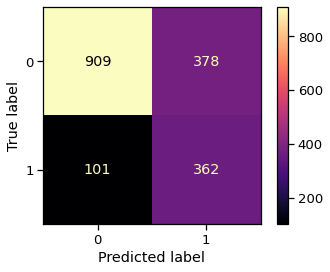

In [81]:
cm = confusion_matrix(y_test, y_pred_test_gridlogreg, labels=logreg_gridcv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_gridcv.classes_)

disp.plot(cmap='magma')
plt.show()

Based on the Hyperparameter tuned logistic regression model that has been made, the confusion matrix obtained says that **there are 909 data that are predicted to be NonChurn, there are 378 data of NonChurn that are predicted to be Churn. Then there are 101 data of Churn which are predicted as NonChurn and 362 data of Churn which are predicted to be correct as Churn.**

In [82]:


print("="*27,"TRAINING","="*27)
print(classification_report(y_train_smnc, y_pred_train_gridlogreg, zero_division=0))
print('Accuracy Score Train: ',accuracy_score(y_train_smnc, y_pred_train_gridlogreg))

print("\n")
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_test_gridlogreg, zero_division=0))
print('Accuracy Score Test: ',accuracy_score(y_test, y_pred_test_gridlogreg))


=========================== TRAINING ===========================
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      3859
           1       0.73      0.80      0.76      3859

    accuracy                           0.75      7718
   macro avg       0.75      0.75      0.75      7718
weighted avg       0.75      0.75      0.75      7718

Accuracy Score Train:  0.7496760818864991


============================== TEST ==============================
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1287
           1       0.49      0.78      0.60       463

    accuracy                           0.73      1750
   macro avg       0.69      0.74      0.70      1750
weighted avg       0.79      0.73      0.74      1750

Accuracy Score Test:  0.7262857142857143


The interpretations that can be obtained from the classification report test data above are:

- Precision: of all the people predicted to churn by the model, 49 % were correct.
- Recall : of all people that is churning, the model only predicted this outcome correctly for 78% of those people.
- F-1 Score: tells how accurate the model has been because the closer the F-1 value is, the more accurate the model will be. In this case, the hyperparameter tuned model that has been made has a score of 0.60 of 1.00. A good model but still needs some improvements.

# **IX. MODEL INFERENCE USING PIPELINE**

In this section I will try to test the results of the LogisticcRegression model using the best parameters of the GridSearchCV results. In this section too, I will use the pipeline in the process

In [83]:
data_inf

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,Contract,PaymentMethod,MonthlyCharges,Churn
0,No,No,No,41,No,Month-to-month,Electronic check,40.35,0
1,No,Yes,No,57,Yes,Month-to-month,Electronic check,55.70,0
2,No,Yes,No,10,No internet service,Month-to-month,Bank transfer,19.95,0
3,No,Yes,Yes,47,No internet service,Two year,Bank transfer,21.30,0
4,No,No,No,1,No,Month-to-month,Mailed check,95.65,1
5,Yes,Yes,No,68,No,Month-to-month,Credit card,80.35,0
6,No,No,No,3,No,Month-to-month,Electronic check,79.25,1
7,No,No,No,67,Yes,One year,Bank transfer,118.35,1
8,No,No,No,1,Yes,Month-to-month,Bank transfer,48.45,0
9,Yes,Yes,No,29,Yes,One year,Bank transfer,90.10,0


In [84]:
num_col = X_train_num.columns.values
cat_col = X_train_cat.columns.values

num_pipe = Pipeline([
    ('scaling', scaler)
])

cat_pipe = Pipeline([
    ('encoding', encoder)
])

preprocess = ColumnTransformer(transformers=[
    ('num', num_pipe, num_col),
    ('cat', cat_pipe, cat_col)
])

pipe = Pipeline([('preprocessing', preprocess), ('classifier', LogisticRegression(C=0.005, l1_ratio=0.1, max_iter=50, penalty='l1',
                   random_state=1, solver='saga'))], memory='cache_folder')

In [85]:
pipe.fit(X_train, y_train)

Pipeline(memory='cache_folder',
         steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  array(['tenure', 'MonthlyCharges'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  array(['SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity',
       'Contract', 'PaymentMethod'], dtype=object))])),
                ('classifier',
                 LogisticRegression(C=0.005, l1_ratio=0.1, max_iter=50,
                                    penalty='l1', random_state=1,
                                    solver='saga'))])

In [86]:
pred_inf = pipe.predict(data_inf)
pred_inf_df = pd.DataFrame(pred_inf, columns=['Churn Prediction'])
pd.concat([data_inf, pred_inf_df], axis=1)

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,Contract,PaymentMethod,MonthlyCharges,Churn,Churn Prediction
0,No,No,No,41,No,Month-to-month,Electronic check,40.35,0,0
1,No,Yes,No,57,Yes,Month-to-month,Electronic check,55.70,0,0
2,No,Yes,No,10,No internet service,Month-to-month,Bank transfer,19.95,0,0
3,No,Yes,Yes,47,No internet service,Two year,Bank transfer,21.30,0,0
4,No,No,No,1,No,Month-to-month,Mailed check,95.65,1,0
5,Yes,Yes,No,68,No,Month-to-month,Credit card,80.35,0,0
6,No,No,No,3,No,Month-to-month,Electronic check,79.25,1,0
7,No,No,No,67,Yes,One year,Bank transfer,118.35,1,0
8,No,No,No,1,Yes,Month-to-month,Bank transfer,48.45,0,0
9,Yes,Yes,No,29,Yes,One year,Bank transfer,90.10,0,0


Based on the prediction results of the LogReg model whose hyperparameters have been tuned, there are 3 data prediction errors. This can be caused by human error, such as during the selection of hyperparameter tuning, there is still human intervention to determine it. Then, in fact the data that I have there is an imbalance between the target class.

# **X. MODEL SAVING**

In [87]:
pickle.dump(pipe, open('pipe.pkl', 'wb'))

# **XI. CONCLUSION**

**Conclusion of Analysis**

- Actually from my understanding churn is a natural thing to happen IF the amount of churn is at a certain ratio.
    - Churn above I may assume because:
    - customers move regions / areas where TELCO services are not reached
    - the customer plans not to use the service for a certain period of time for some reason
and so forth.
- But if the churn ratio is high enough (this is actually relative), it means that I assume that the customer is not satisfied with the service provided or does not match their preferences or expectations.
- From the results of our data exploration, our data is imbalanced (74%: 26%).
- I have also succeeded in creating 5 machine learning models, namely Logistic Regression, SVM, GradienBoosting Classifier, XGBoost Classifier, AdaBoost Classifier. Of these models, the best model is Logistic Regression. The model has also applied hyperparameter tuning using the GridSearchCV method.
- The evaluation metric that I use is the recall method, because I think people who are churning but are classified as not churning will be more detrimental to TELCO.

**Recommendation for TELCO:**

The things that TELCO can do to develop its services from existing data are as follows:

- In order for TELCO to find out the reason why customers with fiber optic services, both old and new customers, relatively many churn. Don't let customer churn go unnoticed, try to dig up information from the customer churn by filling out a satisfaction survey and various other ways to find out why customer churn.
- In addition, there is also a pattern of customer churn found in the initial 5 months of subscribed customers. It is also the same as above. In order to explore why many customers churn.
- customer churn above, the existing data also shows that customers use monthly contracts, meaning that the services provided by TELCO do not match their expectations or preferences. the factors mentioned above, coupled with customers who tend to be flexible, cause customer churn.
- With improvements and improvements, it is hoped that the customer's expectations and preferences can be met and finally the churn of customers, both monthly and annual contracts, can be reduced.
- Encouraging all customers to be able to use paperless billing because it is far very convenient for both customers and TELCO, here I assume paperless billing is electronic billing sent via email.
- At the end of the electronic bill, a customer satisfaction survey is provided to be able to monitor customers more intensely. Then the reward for customers who fill out the service is free administration fees or discounts with a certain nominal for the next month.
- With this step, it is hoped that problems or things that are not in accordance with customer preferences and expectations can emerge and be resolved more quickly so that customer churn can be reduced.

**Recommendation for Machine Learning**

- Try using other machine learning algorithms that have not been covered in this notebook, and apply steps such as: hyperparameter tuning and feature select by feature importances / coef
- Tried other oversampling and undersampling methods such as RandomOversampling and Nearmiss and compared with resampling methods on this notebook.
- Analyzing data from models that are still guessed wrong to find out the reasons and characteristics.